<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis & Forecasting**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Preprocess Time Series Data**

Data Origin: Open Power System Data. You can download the data here. It contains electricity consumption, wind power production, and solar power production for 2006–2017.

In [ ]:
url = 'https://raw.githubusercontent.com/deltorobarba/machinelearning/master/energy.csv'
data = pd.read_csv(url)
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


https://link.medium.com/koN6D5zah7

## **Set Date Format**

**Select & rename features and set date index**

In [ ]:
# Select specific features, and rename features
series = data[['Date', 'Consumption', 'Wind']].rename(columns={"Date": "date", "Consumption": "load", "Wind" : "wind"})

# Set date index
series = series.set_index('date')

# Visualize
series.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='date', length=4383)

**Convert Datatype into Datetime**

Since the datatype is still dtype='object' and not a datetime, we need to convert it to datetime:

In [ ]:
# Set (UTC) date time (UTC means from "2006-01-05" to "2006-01-01 00:00:00+00:00")
series.index = pd.to_datetime(series.index, utc=True)

# Optional: Make naive Datetime time zone aware (turn "2016-11-02 05:00:28" into "2016-11-02 05:00:28+00:00")
# df.index = df.index.tz_localize(tz='UTC')

# Optional: Convert tz-aware Datetime Array/Index from one time zone to another.
# df.index = df.index.tz_convert('US/Central')

# Optional: Sometimes it can be necessary to change time
# df.index = df.index.tz_localize('US/Central', ambiguous='NaT').tz_convert('UTC')
# df.index = df.index + pd.Timedelta(hours=1)

# Visualize
series.head()

,load,wind
date,,
2006-01-01 00:00:00+00:00,1069.184,NaN
2006-01-02 00:00:00+00:00,1380.521,NaN
2006-01-03 00:00:00+00:00,1442.533,NaN
2006-01-04 00:00:00+00:00,1457.217,NaN
2006-01-05 00:00:00+00:00,1477.131,NaN


In [ ]:
series.index

DatetimeIndex(['2006-01-01 00:00:00+00:00', '2006-01-02 00:00:00+00:00',
               '2006-01-03 00:00:00+00:00', '2006-01-04 00:00:00+00:00',
               '2006-01-05 00:00:00+00:00', '2006-01-06 00:00:00+00:00',
               '2006-01-07 00:00:00+00:00', '2006-01-08 00:00:00+00:00',
               '2006-01-09 00:00:00+00:00', '2006-01-10 00:00:00+00:00',
               ...
               '2017-12-22 00:00:00+00:00', '2017-12-23 00:00:00+00:00',
               '2017-12-24 00:00:00+00:00', '2017-12-25 00:00:00+00:00',
               '2017-12-26 00:00:00+00:00', '2017-12-27 00:00:00+00:00',
               '2017-12-28 00:00:00+00:00', '2017-12-29 00:00:00+00:00',
               '2017-12-30 00:00:00+00:00', '2017-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=4383, freq=None)

**Add Frequency (optional)**

Now dtype='datetime64[ns, UTC]', but freq=None. It is not known if data is collected by the hour, by day, my minute, etc. We can set the frequency (Available frequencies in pandas include hourly (‘H’), calendar daily (‘D’), business daily (‘B’), weekly (‘W’), monthly (‘M’), quarterly (‘Q’), annual (‘A’), and many others.)

In [ ]:
series = series.asfreq('D')
series.index

DatetimeIndex(['2006-01-01 00:00:00+00:00', '2006-01-02 00:00:00+00:00',
               '2006-01-03 00:00:00+00:00', '2006-01-04 00:00:00+00:00',
               '2006-01-05 00:00:00+00:00', '2006-01-06 00:00:00+00:00',
               '2006-01-07 00:00:00+00:00', '2006-01-08 00:00:00+00:00',
               '2006-01-09 00:00:00+00:00', '2006-01-10 00:00:00+00:00',
               ...
               '2017-12-22 00:00:00+00:00', '2017-12-23 00:00:00+00:00',
               '2017-12-24 00:00:00+00:00', '2017-12-25 00:00:00+00:00',
               '2017-12-26 00:00:00+00:00', '2017-12-27 00:00:00+00:00',
               '2017-12-28 00:00:00+00:00', '2017-12-29 00:00:00+00:00',
               '2017-12-30 00:00:00+00:00', '2017-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=4383, freq='D')

## **Data Imputation**

**Check for missing data**

In [ ]:
series.apply(lambda x: sum(x.isnull()),axis=0) 
# series.isnull().sum() # Alternative

load       0
wind    1463
dtype: int64

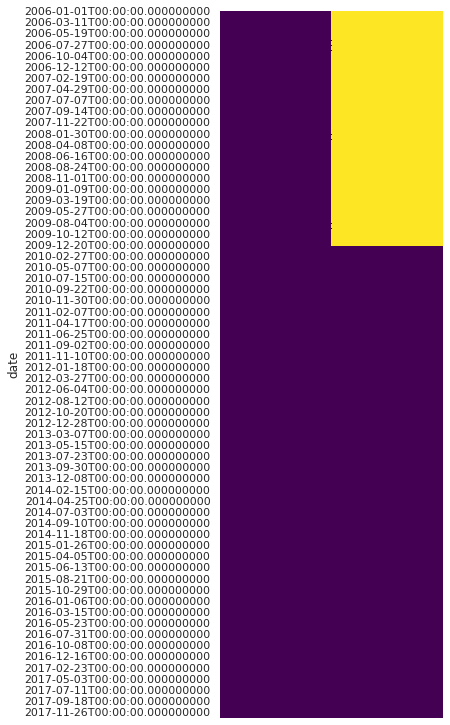

In [ ]:
sns.set(rc={'figure.figsize':(4, 13)})
sns.heatmap(series.isnull(),xticklabels=False,cbar=False,cmap='viridis')

This means there are no data for wind until the end of 2009.

**Also let's check if there are any zero values?** That can sometimes be wrong.

In [ ]:
(series[series == 0.00]).count()

load    0
wind    0
dtype: int64

**Impute Missing Data**

In case, some days are missing in our data, the above code is going to insert empty rows and in each of these rows the values corresponding to the columns would be all NaNs. In order to avoid these NaN values, we can tell as.freq function how to fill these null values

There are two ways to do that:
* **Forward fill**: use it for example for filling minutes in hour-beginning data (e.g. 6:00 am price is valid from 6:00 am until 6:59 am).
* **Backward fill**: use it for example for filling minutes in hour-ending data (e.g. 6:00 am price is valid from 5:01 am until 6:00 am).

> Replacing missing data with medians or means in not such a good idea when it comes to time-series data. Better alternatives exist such as forward filling, backward filling, linear interpolation, mean of nearest neighbours, etc.

In [ ]:
ffill = series['2013-02-03':'2013-02-28']
ffill = ffill[['wind']]
# In case we would have NaN on day 2013-02-04, it would impute the previous day's value
ffill = ffill.asfreq('D', method = 'ffill')
ffill.head()

,wind
date,
2013-02-03 00:00:00+00:00,251.234
2013-02-04 00:00:00+00:00,370.033
2013-02-05 00:00:00+00:00,295.974
2013-02-06 00:00:00+00:00,100.776
2013-02-07 00:00:00+00:00,53.560


This technique of forward filling makes sense on some level — if we are not aware of the amount of power consumption on today’s date, we can always assume it is the same as it was yesterday.

## **Resampling**

**Upsample Datetime Data**

* We can resample from day to week W, quarter Q, month M or year Y etc.
* We can resample by choosing the max value, the mean value etc.

In [ ]:
data_yearly_max = series[['load']].resample('Y').max() # instead of .max you can also use .mean
data_yearly_max.head()

,load
date,
2006-12-31 00:00:00+00:00,1613.312
2007-12-31 00:00:00+00:00,1644.873
2008-12-31 00:00:00+00:00,1606.299
2009-12-31 00:00:00+00:00,1538.894
2010-12-31 00:00:00+00:00,1709.568


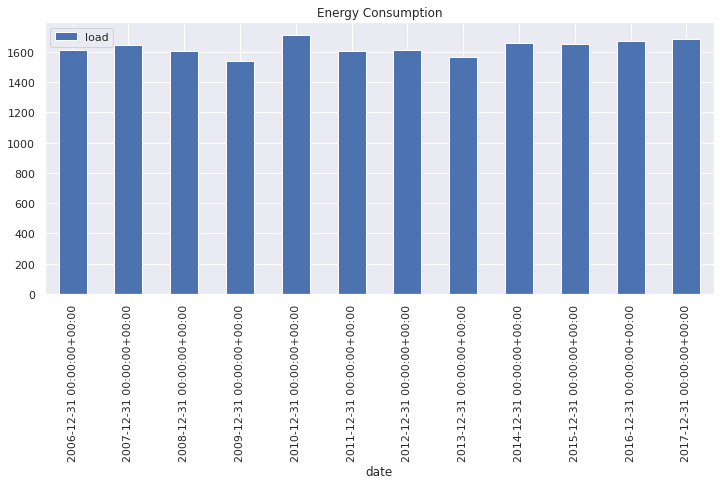

In [ ]:
# Visualize resampled data
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})
data_yearly_max.plot(title='Energy Consumption', kind='bar')

Another way to resample is the following:

In [ ]:
# Filter the daily data to one feature and 2 years
resample = series[['load']]
resample = resample['2015-01-01':'2016-12-31']

# Convert daily data into monthly data
resample["month"] = resample.index.month
resample["year"] = resample.index.year
resample.groupby(["year", "month"]).mean() # instead of .mean you can also use .max

load
year month          
2015 1      1636.978
     2      1651.314
     3      1579.064
     4      1531.944
     5      1445.995
     6      1437.818
     7      1470.200
     8      1423.337
     9      1478.113
     10     1543.672
     11     1616.770
     12     1596.593
2016 1      1672.320
     2      1611.729
     3      1581.822
     4      1507.164
     5      1462.935
     6      1446.406
     7      1419.319
     8      1414.684
     9      1446.824
     10     1506.204
     11     1638.339
     12     1671.129

Text(0.5, 0, 'Year & Month')

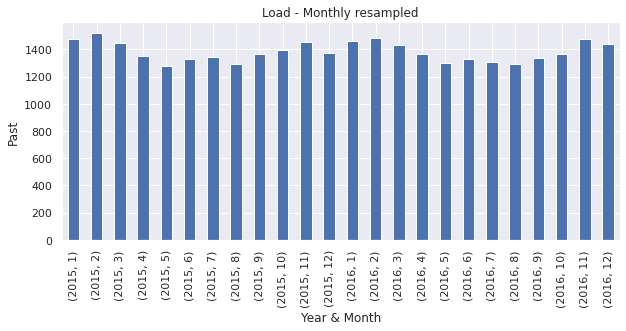

In [ ]:
# Plot the monthly resampling
sns.set(rc={'figure.figsize':(10, 4)})
resample.groupby(["year", "month"])["load"].mean().plot(linewidth=1.0,title='Load - Monthly resampled', kind='bar')
plt.ylabel('Past')
plt.xlabel('Year & Month')

**Downsample Datetime Data**

Now let's turn the daily load (demand / power consumption) data into hourly intervalls. We assume that data is hour-beginning. In this case we need to apply forwardfill operator:

In [ ]:
# Select feature for resampling (optional)
downsample = series[['load']]
downsample.head()

,load
date,
2006-01-01 00:00:00+00:00,1069.184
2006-01-02 00:00:00+00:00,1380.521
2006-01-03 00:00:00+00:00,1442.533
2006-01-04 00:00:00+00:00,1457.217
2006-01-05 00:00:00+00:00,1477.131


In [ ]:
# Resample to hourly intervall, using backfill and set limit 23 hours
downsample = downsample.resample('h', label='right', closed='right').mean().ffill(limit=23)

# Optional: Divide by 12 to turn from MW to MWh
# downsample = downsample.div(12)

# Visualize
downsample.head(28)

,load
date,
2006-01-01 00:00:00+00:00,1069.184
2006-01-01 01:00:00+00:00,1069.184
2006-01-01 02:00:00+00:00,1069.184
2006-01-01 03:00:00+00:00,1069.184
2006-01-01 04:00:00+00:00,1069.184
2006-01-01 05:00:00+00:00,1069.184
2006-01-01 06:00:00+00:00,1069.184
2006-01-01 07:00:00+00:00,1069.184
2006-01-01 08:00:00+00:00,1069.184


We can do the same with hourly data turning into 5 or 15 minutes intervalls. Please note the different limits:

* df.resample('5min', label='right', closed='right').mean().ffill(limit=11)

* df.resample('15min', label='right', closed='right').mean().ffill(limit=3)

## **Merge Tables & Add Derivatives**

**Load another table with daily stock data from Google**

In [ ]:
url = 'https://raw.githubusercontent.com/deltorobarba/machinelearning/master/google.csv'
data = pd.read_csv(url)
google = data[['Date', 'Close']].rename(columns={"Date": "date", "Close": "price"}).set_index('date')
google.index = pd.to_datetime(google.index, utc=True)
google.head()

,price
date,
2010-02-01 00:00:00+00:00,265.514771
2010-02-02 00:00:00+00:00,264.568329
2010-02-03 00:00:00+00:00,269.400208
2010-02-04 00:00:00+00:00,262.406433
2010-02-05 00:00:00+00:00,264.653015


**Merge both tables**

In [ ]:
from functools import reduce
tables = [series, google]
total = reduce(lambda left,right: pd.merge(left,right,on='date'), tables)
total = total.dropna()
total.head()

,load,wind,price
date,,,
2010-02-01 00:00:00+00:00,1536.453,151.409,265.514771
2010-02-02 00:00:00+00:00,1607.625,316.688,264.568329
2010-02-03 00:00:00+00:00,1585.581,225.569,269.400208
2010-02-04 00:00:00+00:00,1521.671,82.257,262.406433
2010-02-05 00:00:00+00:00,1509.085,141.031,264.653015


**Add Derivatives**

In [ ]:
# Add delta between load and wind (Take absolute values of delta and round percentage values)
total['delta'] = (total['load'] - total['wind']).abs().round(2)
total['percent'] = ((total['delta'] / total['load'])*(100)).round(2)
total = total.sort_values(by='delta', ascending=False)
total.head()

,load,wind,price,delta,percent
date,,,,,
2017-01-24 00:00:00+00:00,1682.002,31.375,823.869995,1650.63,98.13
2017-01-23 00:00:00+00:00,1663.492,39.710,819.309998,1623.78,97.61
2014-12-03 00:00:00+00:00,1649.827,26.247,529.865234,1623.58,98.41
2015-01-20 00:00:00+00:00,1629.730,16.737,505.512115,1612.99,98.97
2015-02-04 00:00:00+00:00,1651.314,40.218,521.328674,1611.10,97.56


**Query Table**

In [ ]:
total.max()

load       1709.568000
wind        826.278000
price      1077.140015
delta      1650.630000
percent      99.550000
dtype: float64

We can see the max value for delta was 1650.63. Now we want to know, how many times it was larger than X:

In [ ]:
# How many times went the delta was larger than 1500?
"In %s%% of all days the price delta was > 1500" % np.int_(len(total.loc[total.delta > 1500]) / len((total.delta)) * 100)

'In 3% of all days the price delta was > 1500'

**Remove added Columns**

In [ ]:
total = total.drop(columns=['delta', 'percent']).sort_index(ascending=True)
total.head()

,load,wind,price
date,,,
2010-02-01 00:00:00+00:00,1536.453,151.409,265.514771
2010-02-02 00:00:00+00:00,1607.625,316.688,264.568329
2010-02-03 00:00:00+00:00,1585.581,225.569,269.400208
2010-02-04 00:00:00+00:00,1521.671,82.257,262.406433
2010-02-05 00:00:00+00:00,1509.085,141.031,264.653015


## **Normalize or Standardize**

* Normalization (feature rescaling): data values between 0 and 1.
* Normalization is used when distribution of data is unknown or not Gaussian, and the algorithm does not make assumptions about data distribution (k-nearest neighbors or neural nets). Different formula. One way:

> $x_{n e w}=\frac{x-x_{m i n}}{x_{m a x}-x_{m i n}}$


* Standardization (z-score or t-score): transforms data to have a mean of zero and a standard deviation of 1. z-score is number of standard deviations from mean (e.g. score of 2 is 2 std above mean).
* Standardization assumes Gaussian distribution (not strictly true, but more effective). and the algorithm assumes Gaussian distribution (linear regression, logistic regression, linear discriminant analysis).

> $z_{i}=\frac{x_{i}-\bar{x}}{s}$

**Apply min max scaler (normalize)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = series.copy()
scaler = MinMaxScaler(feature_range=(0,1))
minmax = scaler.fit_transform(minmax)
minmax

array([[0.26152682,        nan],
       [0.62055207,        nan],
       [0.6920626 ,        nan],
       ...,
       [0.52203255, 0.70506422],
       [0.43019555, 0.87199474],
       [0.30526767, 0.87190821]])

**Exkurs: Reformat into pandas dataframe (and round numbers)**

In [ ]:
minmax = pd.DataFrame (minmax, columns = ['load', 'wind']).round(2)
minmax.head()

,load,wind
0,0.26,NaN
1,0.62,NaN
2,0.69,NaN
3,0.71,NaN
4,0.73,NaN


**Divide by max value ever seen in series**

In [ ]:
total = series.apply(lambda x: x/x.cummax(), axis=0)
total = total.dropna()
total.describe()

,load,wind
count,2920.000000,2920.000000
mean,0.789431,0.276189
std,0.097546,0.216730
min,0.526348,0.012313
25%,0.716935,0.113586
50%,0.808642,0.212297
75%,0.856170,0.376214
max,1.000000,1.000000


## **Filter & Visualize**

**Filter specific data**

In [ ]:
# Find top 8 data (first filter feature, then check for largest value)
df = series[['load']].nlargest(8, 'load').round(2)
df.head()

,load
date,
2010-12-01 00:00:00+00:00,1709.57
2017-01-24 00:00:00+00:00,1682.00
2017-01-25 00:00:00+00:00,1674.17
2016-01-19 00:00:00+00:00,1672.32
2016-12-07 00:00:00+00:00,1671.13


**Visualize specific features**

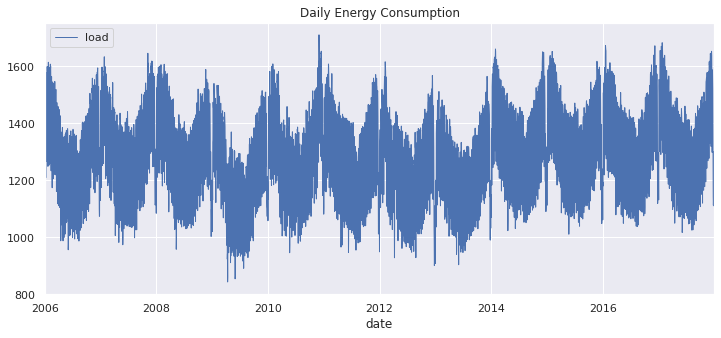

In [ ]:
# Optional: Select on feature to visualize
load = series[['load']]

# Visualize Series
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})
load.plot(title='Daily Energy Consumption')

**Select specific data range in time series**

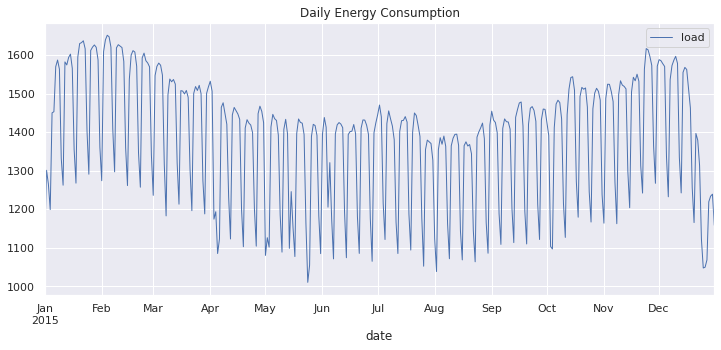

In [ ]:
# Optional: Select specific data range
load_2015 = load['2015-01-01':'2015-12-31']

# Visualize Series
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})
load_2015.plot(title='Daily Energy Consumption')

**Feature Extraction**

Sometimes it's essential to extract the month, day of the week, date, etc for each timestamp (i.e. each row of our data). Since we already have the indices set in the DateTime format, extracting these elements become super easy:

In [ ]:
# Extract the year, month, date separately using the index set
series['Year'] = series.index.year
series['Month'] = series.index.month
#series['Weekday_Name'] = series.index.weekday_name

These additional features can also be useful for exploratory analysis of your dataset. For instance, we can plot the median power consumption for each month.

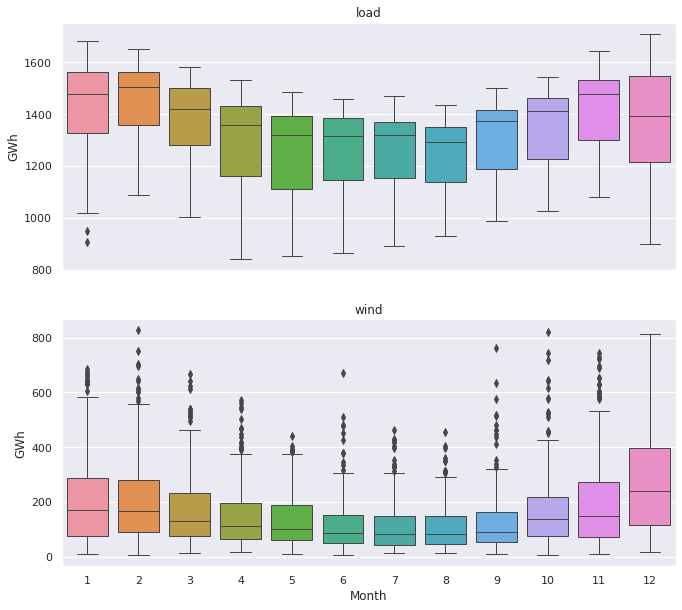

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['load', 'wind'], axes):
    sns.boxplot(data=series, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Keep the x-axis label for only the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

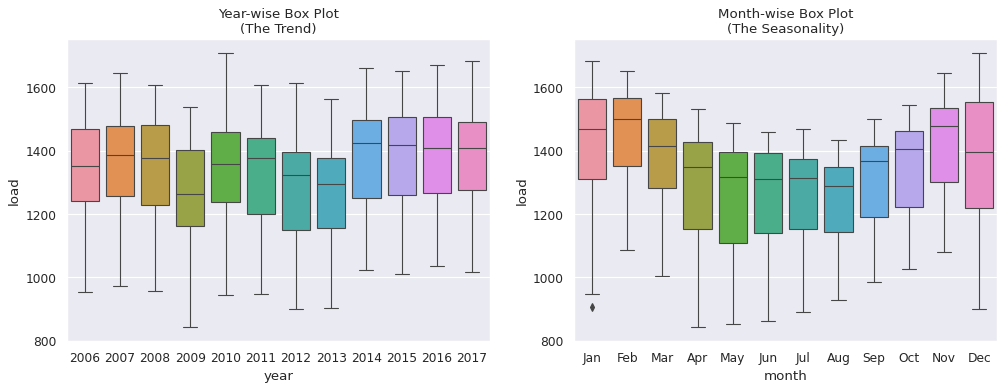

In [ ]:
# Trend and Seasonality Test
seasonal_plots = series.copy()
seasonal_plots.reset_index(inplace=True)

# Prepare data
seasonal_plots['year'] = [d.year for d in seasonal_plots.date]
seasonal_plots['month'] = [d.strftime('%b') for d in seasonal_plots.date]
years = seasonal_plots['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(15,5), dpi= 80)
sns.boxplot(x='year', y='load', data=seasonal_plots, ax=axes[0])
sns.boxplot(x='month', y='load', data=seasonal_plots.loc[~seasonal_plots.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=12); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=12)
plt.show()

# **Residual Analysis**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Residuals are useful in checking whether a model has adequately captured the information in the data. Residuals analysis is very important for reviewing and finetuning classic time series models, but becomes increasingly relevant also for more advanced machine learning models.

Ideally, the residuals are only whote noise processes with no more information left. In a good model the residuals are stationary, which can be broken down into following requirements:

**Essential (necessary) properties:**
1. The residuals are uncorrelated. If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts.
2. The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased.

**Additional useful (but not necessary) properties:**
3. The residuals have constant variance.
4. The residuals are normally distributed.

**What are residuals?**

For most (time series) models, the residuals are difference between observation and its corresponding estimated (fitted) value:

$e_{t} = y_{t} - \hat{y}_{t}$

**Why is it important to analyze residuals?**

Residuals are useful in checking whether a model has adequately captured the information in the data. In a good model the residuals are stationary. However one can classify the stationarity criteria in two distinct groups for residual analysis:

A good forecasting method will yield residuals with the following properties:

**1. The residuals are uncorrelated. If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts.**

**2. The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased.**

Any forecasting method that does not satisfy these properties can be improved. However, that does not mean that forecasting methods that satisfy these properties cannot be improved. It is possible to have several different forecasting methods for the same data set, all of which satisfy these properties. Checking these properties is important in order to see whether a method is using all of the available information, but it is not a good way to select a forecasting method.

If either of these properties is not satisfied, then the forecasting method can be modified to give better forecasts. Adjusting for bias is easy: if the residuals have mean m, then simply add m to all forecasts and the bias problem is solved. Fixing the correlation problem is harder, and we will not address it until Chapter 9.

In addition to these essential properties, it is useful (but not necessary) for the residuals to also have the following two properties.

**3. The residuals have constant variance.**

**4. The residuals are normally distributed.**

These two properties make the calculation of prediction intervals easier (see Section 3.5 for an example). However, a forecasting method that does not satisfy these properties cannot necessarily be improved. Sometimes applying a Box-Cox transformation may assist with these properties, but otherwise there is usually little that you can do to ensure that your residuals have constant variance and a normal distribution. Instead, an alternative approach to obtaining prediction intervals is necessary. Again, we will not address how to do this until later in the book.

[Source 1](https://otexts.com/fpp2/residuals.html) 
[Source2 ](https://otexts.com/fpp2/prediction-intervals.html)

## **Create (Gaussian) White Noise**

Let's use an ideal series distribution for residual analysis. We'll be using white noise, as this is the 

In [ ]:
# Set seed for reproducibility and hyperparameter

from random import gauss
from random import seed
from pandas import Series

seed(1)
mean = 0.0
sigma = 1.0
periods = 5000

# Create White Noise
whitenoise = [gauss(mean, sigma) for i in range(periods)]
whitenoise = pd.DataFrame(data=Series(whitenoise), columns=['whitenoise'])

# Create Time Series
ts = pd.date_range('2010-01-01', periods=periods, freq='D')
ts = pd.DataFrame(data=ts, columns=['ts'])

# Merge and Set Index
series = pd.concat([ts, whitenoise], axis=1).set_index('ts')
series.head()

,whitenoise
ts,
2010-01-01,1.288185
2010-01-02,1.449446
2010-01-03,0.066336
2010-01-04,-0.764544
2010-01-05,-1.092173


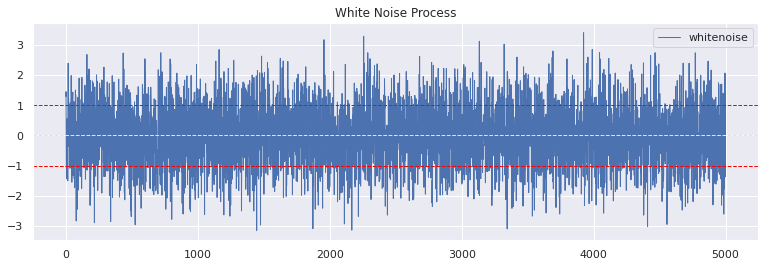

In [ ]:
# Visualize Series
sns.set(rc={'figure.figsize':(13, 4), "lines.linewidth": 1.0})
whitenoise.plot(title='White Noise Process')
plt.axhline(y=1, color='red', linestyle='--', linewidth=1.0)
plt.axhline(y=-1, color='red', linestyle='--', linewidth=1.0)
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.0)

## **Residual Analysis**

**Is the mean zero?**

In [ ]:
series.describe(percentiles=[0.05, 0.95])

,whitenoise
count,5000.000000
mean,-0.000236
std,0.991748
min,-3.149965
5%,-1.663347
50%,-0.006930
95%,1.656811
max,3.400552


In [ ]:
# First central moment: Mean
series.mean()

whitenoise   -0.000236
dtype: float64

In [ ]:
sns.boxplot(series).set_title('White Noise Process - Boxplot')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

Mean is nearly 0.0 and the standard deviation is nearly 1.0. Some variance is expected given the small size of the sample. If we had more data, it might be more interesting to split the series in half and calculate and compare the summary statistics for each half. We would expect to see a similar mean and standard deviation for each sub-series.

**Is the Distribution normal?**

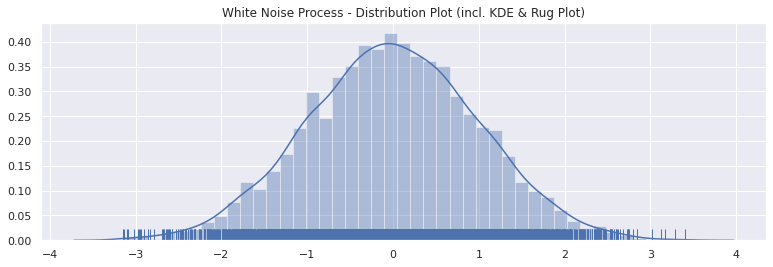

In [ ]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((series), hist=True, rug=True).set_title('White Noise Process - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

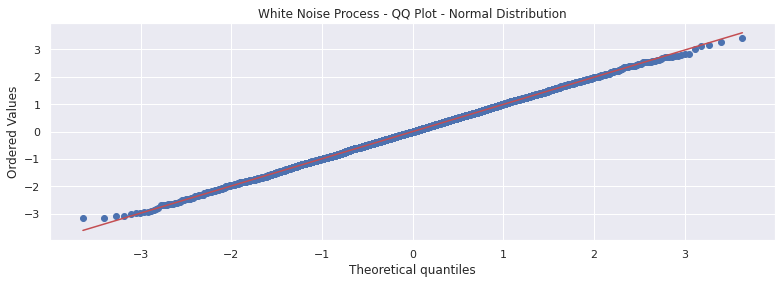

In [ ]:
import scipy
from scipy import stats
stats.probplot(series.whitenoise, dist="norm", plot=plt)
plt.title('White Noise Process - QQ Plot - Normal Distribution')
plt.show()

In [ ]:
# Normal Test. H0: sample comes from a normal distribution
import scipy
from scipy import stats
stats.normaltest(series)

NormaltestResult(statistic=array([1.7988695]), pvalue=array([0.40679954]))

Another way of displaying result 

In [ ]:
k2, p = stats.normaltest(res.residuals)
print("p = {:g}".format(p))

In [ ]:
alpha = 1e-3
if (p < alpha):
  print("The null hypothesis that x comes from a normal distribution can be rejected")
else:
  print("The null hypothesis that x comes from a normal distribution cannot be rejected")

**Are the residuals are uncorrelated?**

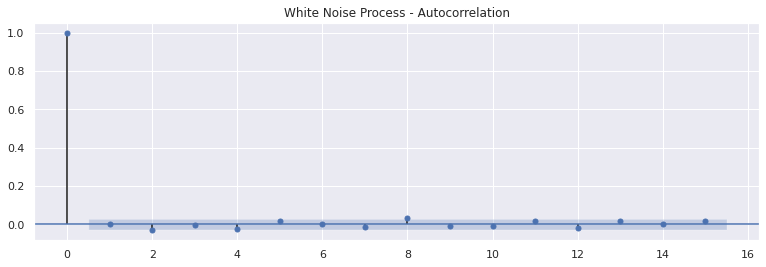

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series.squeeze(), lags=15)
plt.title('White Noise Process - Autocorrelation')
plt.show()

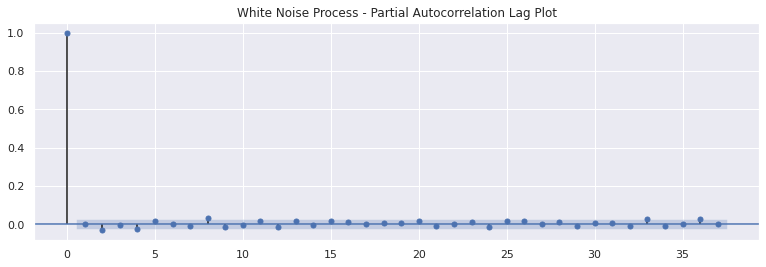

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series)
plt.title('White Noise Process - Partial Autocorrelation Lag Plot')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


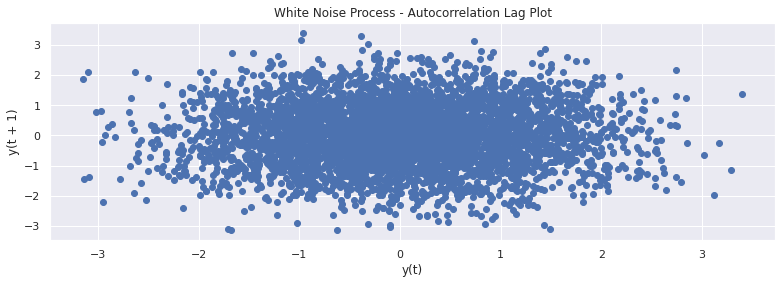

In [ ]:
from pandas.plotting import lag_plot
lag_plot(series)
plt.title('White Noise Process - Autocorrelation Lag Plot')
plt.show()

In [ ]:
# Durban-Watson Statistic. Value 2: no serial correlation. 0: positive correlation. 4: negative correlation
import statsmodels.api as sm
import statsmodels.tsa.stattools
statsmodels.stats.stattools.durbin_watson(series, axis=0)

array([1.99873153])

In [ ]:
# Ljung-Box test of autocorrelation in residuals. H0: independence in a given time series
import statsmodels.api as sm
sm.stats.acorr_ljungbox(series.whitenoise, lags=[(np.int_((periods/2)-2))])

(array([2360.64190127]), array([0.97561779]))

In [ ]:
# BDS Independence Test. H0: Time Series is IID
import statsmodels.api as sm
sm.tsa.stattools.bds(series.whitenoise, max_dim=6, epsilon=None, distance=1.5)

(array([2.20528503, 1.79865181, 1.73497756, 1.50245135, 1.06946712]),
 array([0.0274341 , 0.07207378, 0.08274478, 0.13298058, 0.28485924]))

**Do the residuals have constant variance?**

In [ ]:
# Augmented Dickey Fuller. H0: There is a unit root for the series (non stationary)
from statsmodels.tsa.stattools import adfuller
adfuller(series.whitenoise, maxlag=None, regression='ctt', autolag='AIC', store=False, regresults=False)

(-51.655529537354894,
 0.0,
 1,
 4998,
 {'1%': -4.373450004009452,
  '10%': -3.553992425283714,
  '5%': -3.8335721135923864},
 14024.439778510303)

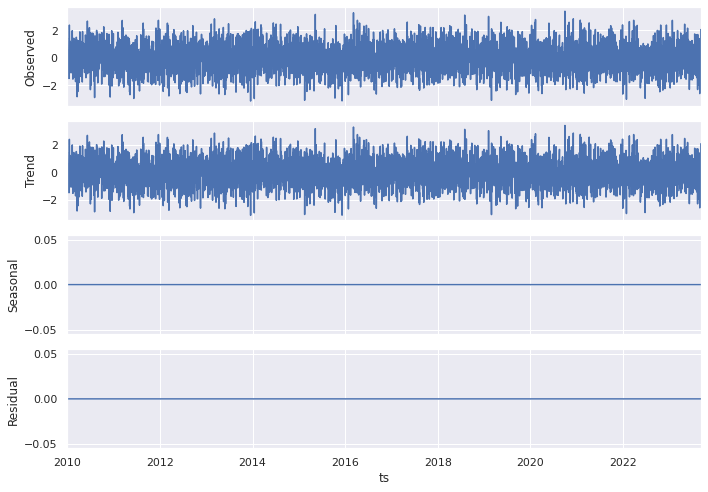

In [ ]:
# Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(rc={'figure.figsize':(10, 7)})
decompose = series
result = seasonal_decompose(decompose, model='additive', freq=1) # or multiplicative
# print(result.trend)
# print(result.seasonal)
# print(result.resid)
# print(result.observed)
result.plot()
plt.show()

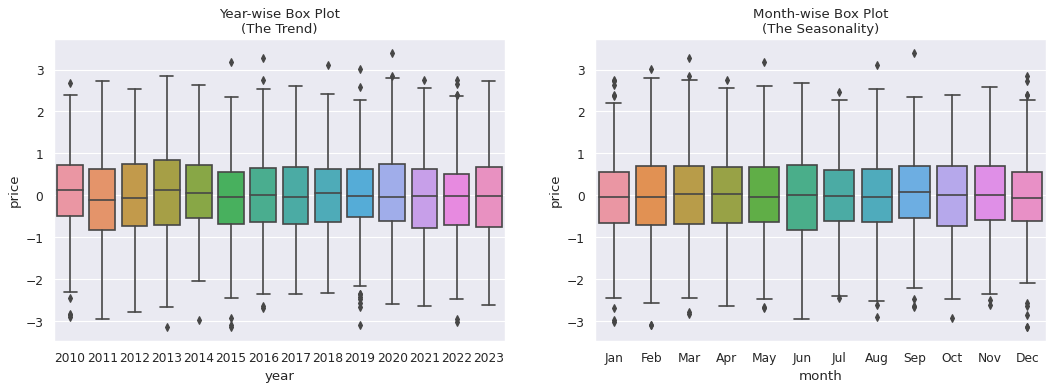

In [ ]:
# Import Data
seasonal_plots = series.copy()

# Transform Series
seasonal_plots.reset_index(inplace=True)
seasonal_plots = seasonal_plots.rename(columns={"ts": "date", "whitenoise" : "price"})

# Prepare Data
seasonal_plots['year'] = [d.year for d in seasonal_plots.date]
seasonal_plots['month'] = [d.strftime('%b') for d in seasonal_plots.date]
years = seasonal_plots['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(16,5), dpi= 80)
sns.boxplot(x='year', y='price', data=seasonal_plots, ax=axes[0])
sns.boxplot(x='month', y='price', data=seasonal_plots.loc[~seasonal_plots.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=12); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=12)

plt.show()

# **Granger Causality**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In order to determine whether one time series causes another, the most common approach is the so-called **Granger causality test**.

The Granger causality test is a statistical hypothesis test for determining whether one time series is useful in forecasting another, first proposed in 1969. Ordinarily, regressions reflect "mere" correlations, but Clive Granger argued that causality in economics could be tested for by measuring the ability to predict the future values of a time series using prior values of another time series.

Granger defined the causality relationship based on two principles:

* The cause happens prior to its effect.
* The cause has unique information about the future values of its effect.


A time series X is said to **Granger-cause** Y if it can be shown, usually through a series of t-tests and F-tests on lagged values of X (and with lagged values of Y also included), that those X values provide statistically significant information about future values of Y.

If a time series is a **stationary process**, the test is performed using the level values of two (or more) variables. If the variables are non-stationary, then the test is done using first (or higher) differences. The number of lags to be included is usually chosen using an information criterion, such as the Akaike information criterion or the Schwarz information criterion. 

**Import data**

In [ ]:
url = 'https://raw.githubusercontent.com/deltorobarba/machinelearning/master/google.csv'
data = pd.read_csv(url)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-02-01,266.301849,266.904572,264.159851,265.514771,265.514771,4518400
1,2010-02-02,266.481171,266.481171,262.819885,264.568329,264.568329,8223000
2,2010-02-03,263.347900,270.037842,263.128723,269.400208,269.400208,6020500
3,2010-02-04,267.497345,267.995483,261.798706,262.406433,262.406433,6780600
4,2010-02-05,263.213409,265.753876,260.254517,264.653015,264.653015,6335600


**Preprocess Original Series**

In [ ]:
# preprocess = data.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume']) # Alternative to select below
preprocess = data[['Date', 'Close']].rename(columns={"Date": "date", "Close": "price"}).set_index('date')
preprocess.index = pd.to_datetime(preprocess.index, utc=False)
preprocess.head()

,price
date,
2010-02-01,265.514771
2010-02-02,264.568329
2010-02-03,269.400208
2010-02-04,262.406433
2010-02-05,264.653015


**Create Additional Series for Granger Causality Test**

* We are adding a series that is simply a copy of the original series but shifted by t-1. This is a 'ideal case' since in financial time series the previous time step determines to a strong degree the next one.
* Let's also add some gaussian noise with standard deviation and a non-zero mean to the new time series, so that it's not exactly a 1:1 of the original time series

In [ ]:
# Define noise
mean = 50 # mean of the distribution
sigma = 7 # standard deviation of distribution
sample = preprocess.price.count() # number of elements in array

noise = (np.random.normal(mean,sigma,sample))

In [ ]:
# Alternative Noise
# t = np.linspace(1, 100, (preprocess.price.count()))
# noise = 100*np.sin(t/(2*np.pi))

* *Fun fact*: 7 sigma (standard deviations) are chosen from the normal distribution. From the rules for normally distributed data for a daily event this corresponds to a [approximate frequency for daily events](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule#Table_of_numerical_values) every 1.07 billion years (four times in history of Earth).

In [ ]:
# Create final table with additional series called 'past'
series = preprocess.rename(columns={'price' : 'present'})
series['past'] = ((series.present).shift(-1) + noise).dropna()
series.head()

,present,past
date,,
2010-02-01,265.514771,453.134653
2010-02-02,264.568329,431.802620
2010-02-03,269.400208,435.799401
2010-02-04,262.406433,443.283068
2010-02-05,264.653015,427.893408


**Difference both Series**

Granger causality requires stationary time series as input

In [ ]:
# Augmented Dickey Fuller. H0: There is a unit root for the series (non stationary)
from statsmodels.tsa.stattools import adfuller
adfuller(series.present, maxlag=None, regression='ctt', autolag='AIC', store=False, regresults=False)

(-4.062315034834605,
 0.02630244592391451,
 18,
 2497,
 {'1%': -4.375776615294273,
  '10%': -3.5547264517170936,
  '5%': -3.8347571289440716},
 18853.98361280409)

In [ ]:
differenced = series
differenced = differenced.drop(columns=['present', 'past'])
differenced['present'] = ((series.present) - ((series.present).shift(1)))
differenced['past'] = ((series.past) - ((series.past).shift(1)))
differenced = differenced.dropna()
differenced.head()

,present,past
date,,
2010-02-02,-0.946442,3.854768
2010-02-03,4.831879,-2.542667
2010-02-04,-6.993775,-10.700025
2010-02-05,2.246582,11.362438
2010-02-08,1.085938,5.840977


## **Correlation**

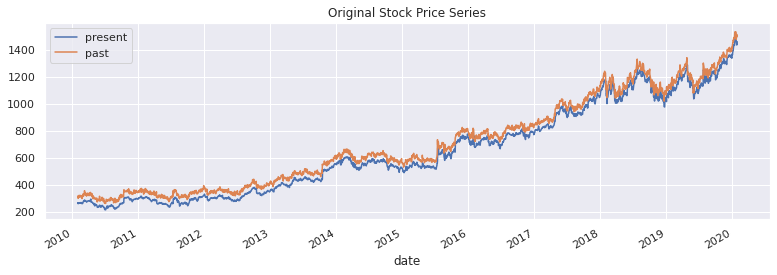

In [ ]:
sns.set(rc={'figure.figsize':(13, 4)})
series.plot(linewidth=1.5,title='Original Stock Price Series')

**Jointplot and Pairplot**

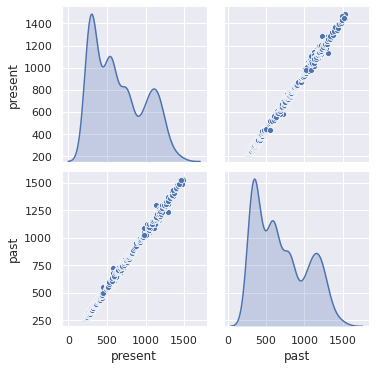

In [ ]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.pairplot(series, diag_kind='kde')

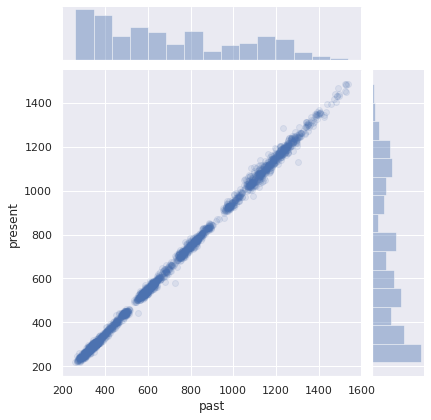

In [ ]:
sns.jointplot(x="past", y="present", data=series, alpha=0.1);

**Bin & Group**

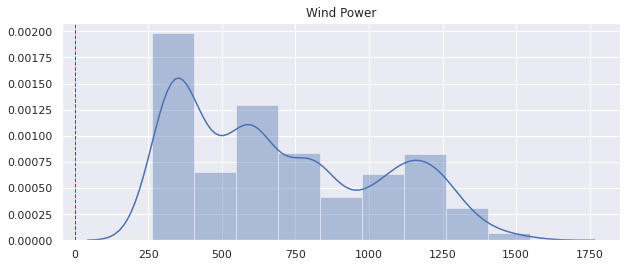

In [ ]:
df = series[['past']]
sns.set(rc={'figure.figsize':(10, 4)})
sns.distplot((df), hist=True, rug=False, bins=9).set_title('Wind Power')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0);
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


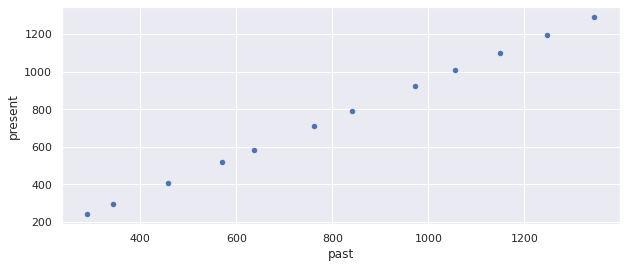

In [ ]:
# Select features and set limit (optional)
df = series[['past', 'present']].where(series['past'] < 1600)

# Determine bins based on distribution analysis
bins = [200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]
labels = [1,2,3,4,5,6,7,8,9,10,11,12]

# Create bins based on bins and labels
df['binned'] = pd.cut(df['past'], bins=bins, labels=labels)

# Groupby bins, call mean value in each bin and display as scatterplot
df.groupby(pd.cut(df['past'], bins=bins)).mean().plot.scatter('past', 'present')

In [ ]:
# Show bins as table
s = pd.cut(df['past'], bins=bins).value_counts()
s

(300, 400]      610
(500, 600]      276
(600, 700]      239
(1100, 1200]    217
(800, 900]      211
(400, 500]      207
(1200, 1300]    183
(700, 800]      181
(1000, 1100]    138
(200, 300]       91
(900, 1000]      84
(1300, 1400]     50
Name: past, dtype: int64

**(Robust) Regression**

Visual confirmation that data is not normally distributed. Let's run another simple regression, but this time as **robust regression. This will de-weight outliers.** (Note that this is substantially more computationally intensive than standard linear regression, so you may wish to decrease the number of bootstrap resamples (n_boot) or set ci to None.)

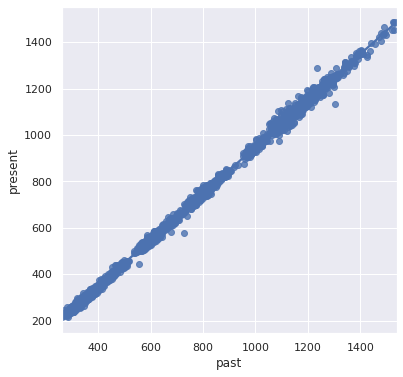

In [ ]:
# Plot data and a robust regression model fit
sns.set(rc={'figure.figsize':(6, 6)})
sns.regplot(x="past", y="present", data=series, robust=True, ci=None)

## **Covariance**

## **Cointegration**

**Johansen Cointegration**

Let's first run a **cointegration test**. If two time series, X and Y, are cointegrated, there must exist Granger causality either from X to Y, or from Y to X, both in both directions. (However note that the presence of Granger causality in either or both directions between X and Y does not necessarily imply that the series will be cointegrated.)

**Cointegration between (artificial) previous day close value and current day close value?**

In [ ]:
# Johansen Cointegration. H0: There is no cointegration.
import statsmodels.api as sm
import statsmodels.tsa.stattools
statsmodels.tsa.stattools.coint(differenced.past, differenced.present, trend='ct', method='aeg', autolag='aic')

(-11.898685462661787,
 8.516632504064017e-22,
 array([-4.33376918, -3.78435647, -3.49912914]))

Very small p-value. Reject H0. Cointegration present. Granger causality must exit.

## **Causality**

**Granger Causality Test**

Ordinarily, regressions reflect "mere" correlations, but Clive Granger argued that causality in economics could be tested for by measuring the ability to predict the future values of a time series using prior values of another time series. The Granger causality test is a statistical hypothesis test for determining whether one time series is useful in forecasting another, first proposed in 1969.

Granger defined the causality relationship based on two principles:

* The cause happens prior to its effect.
* The cause has unique information about the future values of its effect.


A time series X is said to **Granger-cause** Y if it can be shown, usually through a series of t-tests and F-tests on lagged values of X (and with lagged values of Y also included), that those X values provide statistically significant information about future values of Y.

If a time series is a **stationary process**, the test is performed using the level values of two (or more) variables. If the variables are non-stationary, then the test is done using first (or higher) differences. The number of lags to be included is usually chosen using an information criterion, such as the Akaike information criterion or the Schwarz information criterion. 

Granger causality (1969) requires both series to be stationary, so let's test whether this is true for both time series, and difference them until they are stationary. (Toda-Yamamoto causality requies no such criteria, the test can be applied to both stationary and non stationary data).

Most financial time series exhibit a unit root and need to be differenced once. Additionally they demonstrate a trend upward ('random walk with drift'). Also there might some seasonality.

**Stationarity Test (Past)**

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(differenced.past, maxlag=None, regression='nc', autolag='AIC', store=False, regresults=False)

(-11.432490487957478,
 9.355431899618207e-21,
 19,
 2494,
 {'1%': -2.566637054647272,
  '10%': -1.616713939107425,
  '5%': -1.941108237457268},
 20137.469622549997)

**Stationarity Test (Present)**

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(differenced.present, maxlag=None, regression='nc', autolag='AIC', store=False, regresults=False)

(-11.300247000508126,
 1.7331869542573804e-20,
 17,
 2496,
 {'1%': -2.5666363353866184,
  '10%': -1.616714023745387,
  '5%': -1.9411081502986165},
 18859.171083336038)

Past & present series are stationary. They have been a unit root before, since it had to be differenced once only.

**Run Granger Causality Test**

The Null hypothesis for grangercausalitytests is that the time series in the second column, x2, does NOT Granger cause the time series in the first column, x1. **Grange causality means that past values of x2 have a statistically significant effect on the current value of x1, taking past values of x1 into account as regressors**. We reject the null hypothesis that x2 does not Granger cause x1 if the pvalues are below a desired size of the test.

However note that:
* Granger causality cannot take into account third hidden factors affecting both series
* Granger can also not differentiate no-linear relationships (when two factors cause each other). Please see CCM (Convergent Cross Mapping) as a more advanced approach for non-linear relationships.


**Hypothesis test**: Does the (artificial) previous day value cause the current day close value?

In [ ]:
# Granger Causality
# Null hypothesis: x2 does NOT Granger cause x1
# Reject null hypothesis if the p-values are below 0.05
import statsmodels.api as sm
import statsmodels.tsa.stattools
statsmodels.tsa.stattools.grangercausalitytests(differenced, maxlag = 5, addconst=True, verbose=True)

Excellent result: p-value is zero. Reject H0. It can be rejected that x2 (past values) does not Granger cause x1 (present values of same time series). Or in layman's terms: there is a strong indication that past price value cause the present price values.

# **Identically and Independently Distributed Data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* In probability theory and statistics, a collection of random variables is independent and identically distributed if each random variable has the same probability distribution as the others and all are mutually independent. This property is usually abbreviated as i.i.d. or iid or IID. Herein, i.i.d. is used, because it is the most prevalent.

* In machine learning theory, i.i.d. assumption is often made for training datasets to imply that all samples stem from the same generative process and that the generative process is assumed to have no memory of past generated samples.

* The i.i.d. assumption is important in the classical form of the central limit theorem, which states that the probability distribution of the sum (or average) of i.i.d. variables with finite variance approaches a normal distribution.

* In statistics, it is **commonly assumed** that observations in a sample are effectively i.i.d.. The assumption (or requirement) that observations be i.i.d. tends to **simplify the underlying mathematics** of many statistical methods (see mathematical statistics and statistical theory). In practical applications of statistical modeling, however, the **assumption may or may not be realistic**.

* To partially test how realistic the assumption is on a given data set, the **correlation** can be computed, **lag plots** drawn or **turning point test** performed. The generalization of exchangeable random variables is often sufficient and more easily met.

https://en.m.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables

## **Independence**

* **Self-independence** of an event (Thus an event is independent of itself if and only if it almost surely occurs or its complement almost surely occurs; this fact is useful when proving [zero–one laws](https://en.m.wikipedia.org/wiki/Zero–one_law).)

* **Expectation** E [XY] = E[X][Y] and **covariance** is zero (The converse of these, i.e. the proposition that if two random variables have a covariance of 0 they must be independent, is not true.)

* Independence of the trials implies that the process is memoryless. Given that the probability p is known, past outcomes provide no information about future outcomes. (If p is unknown, however, the past informs about the future indirectly, through inferences about p.)

* Two events are independent, statistically independent, or stochastically independent if the occurrence of one does not affect the probability of occurrence of the other (equivalently, does not affect the odds). Similarly, two random variables are independent if the realization of one does not affect the probability distribution of the other.

* If the process is infinite, then from any point the future trials constitute a Bernoulli process identical to the whole process, the fresh-start property.

## **Identically Distributed**

* Two variables (X,Y) are identically distributed (ID) if they have the **same probability distribution**. 

* A sufficient condition for this is that **CDF(X)=CDF(Y)** where CDF stands for Cumulative Distribution Function. 

* A textbook way of describing this would be to write P(x ≤ X) = P(y ≤ Y). Even more formally and in the general case of k random variables (X1, X2... Xn) it can be said that they are Identically Distributed if their **marginal distributions have the same form**: fk(Xk;θk) ≡ fk(Xk;θ), for all k=1,2...,n.

* The necessity for variables to be identically distributed plays a significant role in a classical Null Hypothesis Statistical Test where the full definition of the null hypothesis states, among other things that the two variables are identically distributed.

* An immediate consequence of the requirement for identical distributions is that data analyzed under the assumption of ID should have **constant mean and variance**. If the data has a trend this assumptions is violated and a statistical model with the ID assumption in it becomes misspecified.

## **Examples**

**Examples of IID**

* IID sampling of a subset of a population: each example in the population has the same chance of being observed.

* i.i.d. variables are thought of as a discrete time Lévy process: each variable gives how much one changes from one time to another. For example, a sequence of Bernoulli trials is interpreted as the Bernoulli process. 

* One may generalize this to include continuous time Lévy processes, and many Lévy processes can be seen as limits of i.i.d. variables—for instance, the Wiener process is the limit of the Bernoulli process.

* The **first difference of a random walk (or: the steps of a random walk)** are IID: This model assumes that in each period the variable takes a random step away from its previous value, and the steps are independently and identically distributed in size (“i.i.d.”). This is equivalent to saying that the first difference of the variable is a series to which the mean model should be applied. So, if you begin with a time series that wanders all over the map, but you find that its first difference looks like it is an i.i.d. sequence, then a random walk model is a potentially good candidate.

* **Bernoulli process** is a sequence of independent identically distributed Bernoulli trials. A Bernoulli process is a finite or infinite sequence of binary random variables, so it is a discrete-time stochastic process that takes only two values, canonically 0 and 1. The component Bernoulli variables Xi are identically distributed and independent. Prosaically, a Bernoulli process is a repeated coin flipping, possibly with an unfair coin (but with consistent unfairness).

* **White noise** is always an independent process but reverse may not be true. (First moment has to be zero and second moment has to be finite though)

* A sequence of outcomes of spins of a fair or unfair roulette wheel is i.i.d. One implication of this is that if the roulette ball lands on "red", for example, 20 times in a row, the next spin is no more or less likely to be "black" than on any other spin (see the [Gambler's fallacy](https://en.m.wikipedia.org/wiki/Gambler's_fallacy)).

* A sequence of fair or loaded dice rolls is i.i.d. A sequence of fair or unfair coin flips is i.i.d.

* In signal processing and image processing the notion of transformation to i.i.d. implies two specifications, the "i.d." (i.d. = identically distributed) part and the "i." (i. = independent) part: (i.d.) the signal level must be balanced on the time axis. (i.) the signal spectrum must be flattened, i.e. transformed by filtering (such as deconvolution) to a white noise signal (i.e. a signal where all frequencies are equally present).

* An i.i.d. sequence does not imply the probabilities for all elements of the sample space or event space must be the same. For example, repeated throws of loaded dice will produce a sequence that is i.i.d., despite the outcomes being biased.

* A sample of face images coming from a random group of different ethnicities, sex and age can be considered independent.

* Selecting numbered balls from an opaque bowl with replacement is iid

* Randomly selected characters written by a large number of people are independent in terms of the whole population of handwritten characters.

**Data Samples that do not satisfy i.i.d. assumption**

* If during the data collection, one was permitted to choose the examples to be sampled, it is most likely that such a sample would be skewed towards some subset of the universe of possible observations.

* Another possible scenario is called convenience sample, in which those easily accessible individuals/examples are more likely to be sampled.

* In summary, the samples are dependent if the values in one sample affect the values in the other; the samples are independent if the values in one sample reveal no information about samples drawn next.

* A medical dataset where multiple samples are taken from multiple patients, it is very likely that samples from same patients may be correlated.

* Samples drawn from time dependent processes, for example, year-wise census data.

* An i.i.d. sequence is different from a Markov sequence, where the probability distribution for the nth random variable is a function of the previous random variable in the sequence (for a first order Markov sequence).

* Selecting numbered balls from an opaque bowl without replacement is not iid.

* predict a word in a given language, e.g. English, the sample (sequence of characters) is dependent due to the current observation affects the following ones (when a consonant is written, say “z”, it reveals information about the next character)

## **Test for IID**

To partially test how realistic the assumption is on a given data set, the correlation can be computed, lag plots drawn or turning point test performed. The generalization of exchangeable random variables is often sufficient and more easily met.

**First Example: (Gaussian) White Noise** 

Hypothesis: Should be iid.

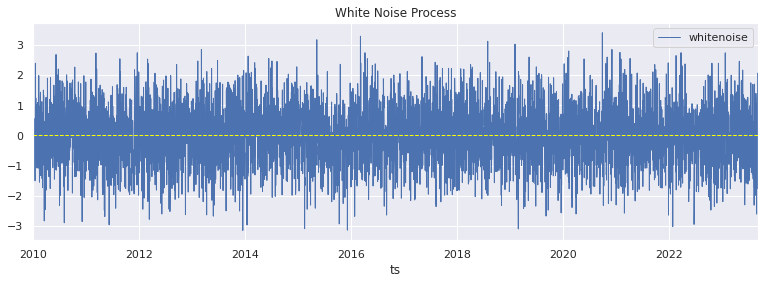

In [ ]:
from random import gauss
from random import seed
from pandas import Series

# Set seed for reproducibility and hyperparameter
seed(1)
mean = 0.0
sigma = 1.0
periods = 5000

# Create White Noise
whitenoise = [gauss(mean, sigma) for i in range(periods)]
whitenoise = pd.DataFrame(data=Series(whitenoise), columns=['whitenoise'])

# Create Time Series
ts = pd.date_range('2010-01-01', periods=periods, freq='D')
ts = pd.DataFrame(data=ts, columns=['ts'])

# Merge and Set Index
series = pd.concat([ts, whitenoise], axis=1).set_index('ts')

# Visualize
sns.set(rc={'figure.figsize':(13, 4), "lines.linewidth": 1.0})
series.plot(title='White Noise Process')
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.0)

**Second Example: Google Stock Prices** 

Hypothesis: Should NOT be iid.

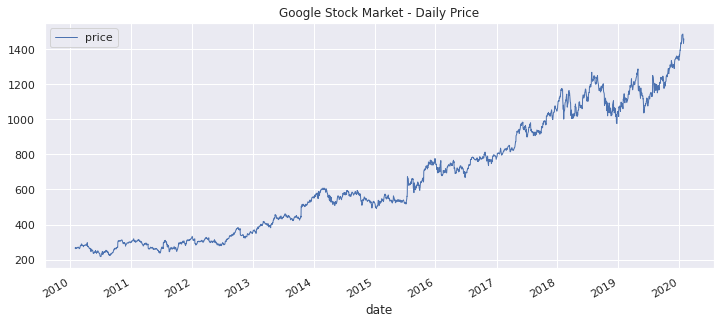

In [ ]:
url = 'https://raw.githubusercontent.com/deltorobarba/machinelearning/master/google.csv'
data = pd.read_csv(url)
google = data[['Date', 'Close']].rename(columns={"Date": "date", "Close": "price"}).set_index('date')
google.index = pd.to_datetime(google.index, utc=False)
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})
google.plot(title='Google Stock Market - Daily Price')

**Autocorrelation Plots**

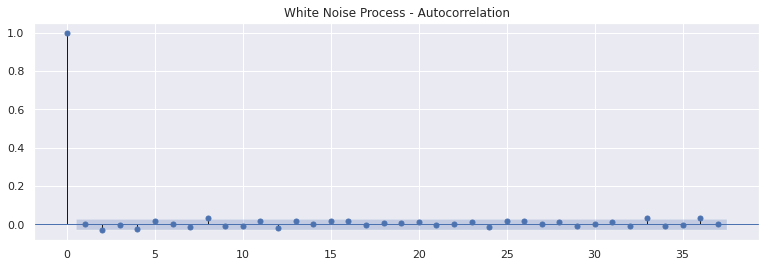

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
# plot_acf(series.squeeze(), lags=15)
plot_acf(series)
plt.title('White Noise Process - Autocorrelation')
plt.show()

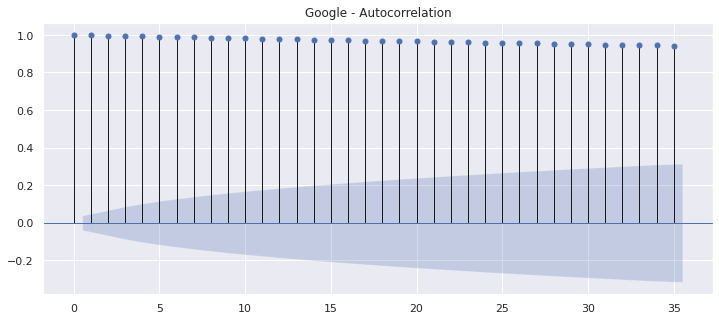

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
# plot_acf(series.squeeze(), lags=15)
plot_acf(google)
plt.title('Google - Autocorrelation')
plt.show()

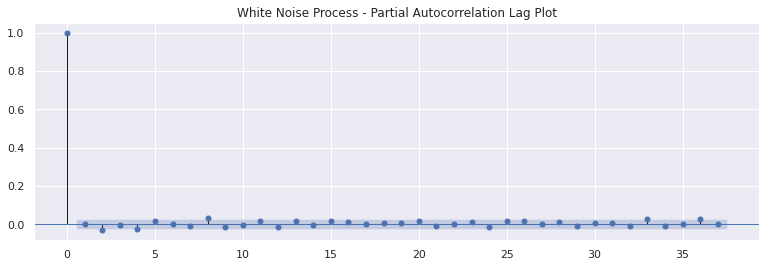

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series)
plt.title('White Noise Process - Partial Autocorrelation Lag Plot')
plt.show()

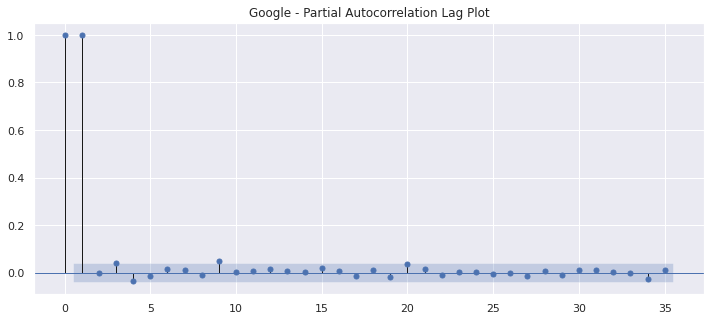

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(google)
plt.title('Google - Partial Autocorrelation Lag Plot')
plt.show()

**Lag Plot**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


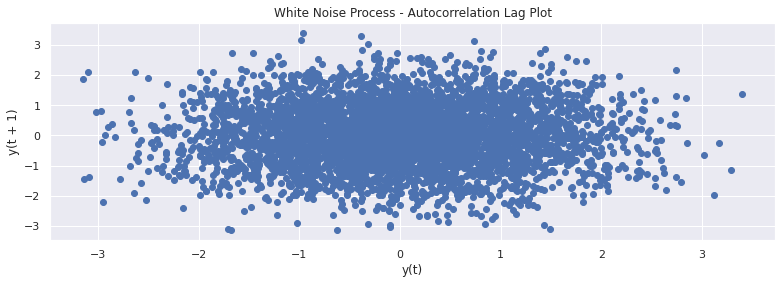

In [ ]:
from pandas.plotting import lag_plot
lag_plot(series)
plt.title('White Noise Process - Autocorrelation Lag Plot')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


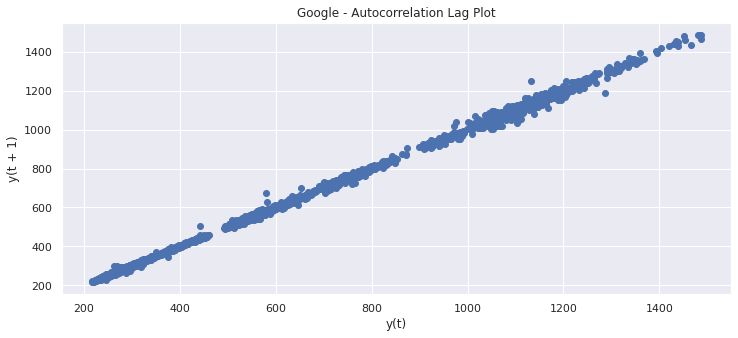

In [ ]:
from pandas.plotting import lag_plot
lag_plot(google)
plt.title('Google - Autocorrelation Lag Plot')
plt.show()

**Durban-Watson Statistic**

* Is a test for autocorrelation in the residuals from a statistical regression analysis.
* The null hypothesis of the test is that there is no serial correlation
* This statistic will always be between 0 and 4. Closer to 0: evidence for positive serial correlation, closer to 4: negative serial correlation. 2 means no autocorrelation.

In [ ]:
# Durban-Watson Statistic. Value 2: no serial correlation. 0: positive correlation. 4: negative correlation
import statsmodels.api as sm
import statsmodels.tsa.stattools
statsmodels.stats.stattools.durbin_watson(series, axis=0)

array([1.99873153])

Test statistic is close to 2. There is no autocorrelation present.

In [ ]:
# Durban-Watson Statistic. Value 2: no serial correlation. 0: positive correlation. 4: negative correlation
import statsmodels.api as sm
import statsmodels.tsa.stattools
statsmodels.stats.stattools.durbin_watson(google, axis=0)

array([0.0002163])

Test statistic is close to 0. There is autocorrelation present.

**Ljung-Box Q Statistic**

In [ ]:
# Ljung-Box test of autocorrelation in residuals. H0: independence in a given time series
import statsmodels.api as sm
sm.stats.acorr_ljungbox(series.whitenoise, lags=[(np.int_((periods/2)-2))])

(array([2360.64190127]), array([0.97561779]))

P-value > zero. Do not reject H0. Series is independent.

In [ ]:
# Ljung-Box test of autocorrelation in residuals. H0: independence in a given time series
import statsmodels.api as sm
sm.stats.acorr_ljungbox(google.price, lags=[(np.int_((periods/2)-2))])

(array([2100276.01821409]), array([0.]))

P-value = zero. Reject H0. Series is not independent.

**BDS Independence Test**

* Brock, W. Dechert and J. Scheinkman
* BDS test statistic for independence of a time series
* Time Series is IID (= Null Hypothesis)
* The BDS test is free of nuisance parameters, but it suffers from some problems. For instance, the power of the BDS test depends on the choice of value of the dimensional distance parameter. Another problem is that the BDS test, though asymptotically normal under the null, has high rates of Type I error, especially for non Gaussian data

In [ ]:
# BDS Independence Test. H0: Time Series is IID
import statsmodels.api as sm
sm.tsa.stattools.bds(series.whitenoise, max_dim=6, epsilon=None, distance=1.5)

(array([2.20528503, 1.79865181, 1.73497756, 1.50245135, 1.06946712]),
 array([0.0274341 , 0.07207378, 0.08274478, 0.13298058, 0.28485924]))

P-value is > 0.05. Series is IID.

In [ ]:
# BDS Independence Test. H0: Time Series is IID
import statsmodels.api as sm
sm.tsa.stattools.bds(google.price, max_dim=6, epsilon=None, distance=1.5)

(array([205.70258454, 225.00196538, 249.17950684, 283.32870842,
        329.89981469]), array([0., 0., 0., 0., 0.]))

P-value is = 0. Series is not IID.

https://www.gakhov.com/articles/find-turning-points-for-a-trajectory-in-python.html

# **Autocorrelation**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Create Example Data: (Gaussian) White Noise**

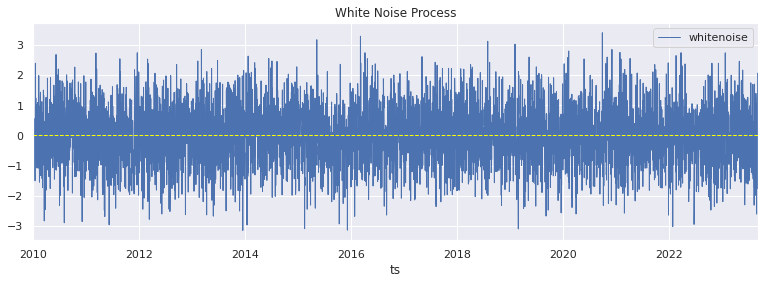

In [ ]:
from random import gauss
from random import seed
from pandas import Series

# Set seed for reproducibility and hyperparameter
seed(1)
mean = 0.0
sigma = 1.0
periods = 5000

# Create White Noise
whitenoise = [gauss(mean, sigma) for i in range(periods)]
whitenoise = pd.DataFrame(data=Series(whitenoise), columns=['whitenoise'])

# Create Time Series
ts = pd.date_range('2010-01-01', periods=periods, freq='D')
ts = pd.DataFrame(data=ts, columns=['ts'])

# Merge and Set Index
series = pd.concat([ts, whitenoise], axis=1).set_index('ts')

# Visualize
sns.set(rc={'figure.figsize':(13, 4), "lines.linewidth": 1.0})
series.plot(title='White Noise Process')
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.0)

## **Relevance**

* Used as input parameter in classical time series models, such as (S)Arima(x), Garch or Auto Vectorregression (VaR), to identify for example seasonality.
* Most financial time series exhibit some form of autocorrelation
* A series can contain autocorrelation an be stationary, as long as there is a constant autocorrelation structure over time (and series has no trend, constant variance over time, and no periodic fluctuations like seasonality).
* But if autocorrelation is zero does NOT mean that a process is stationary. Generally autocorrelation doesn't cause non-stationarity, and non-stationarity doesn't require autocorrelation.
* Can be used to test whether a series is independent (as part of IID), by testing that the autocorrelations at all non zero lags are 0 (using if the data have an index ordering).
* Portmanteau tests are statistical tests that can be used to test whether several autocorrelation coefficients differ significantly from zero. This is particularly important when checking the residuals' freedom from autocorrelation during the diagnosis phase of a time series analysis. Portmanteau tests are purely significance tests. You are not testing against a clearly formulated counter-hypothesis. The test statistic is called Q statistic.

## **Autocorrelation Plots**

**Autocorrelation Plot**

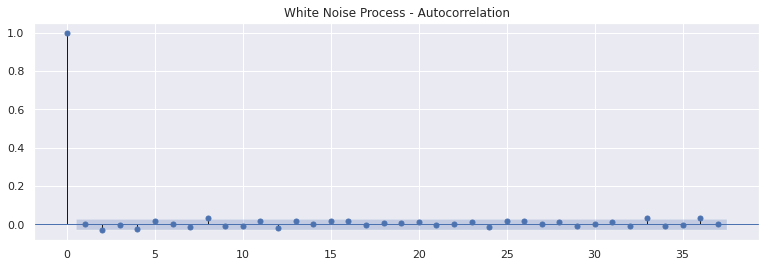

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
# plot_acf(series.squeeze(), lags=15)
plot_acf(series)
plt.title('White Noise Process - Autocorrelation')
plt.show()

There may be some spikes above the 95% and 99% confidence level, but these are a statistical fluke.

**Partial Autocorrelation Lag Plot**

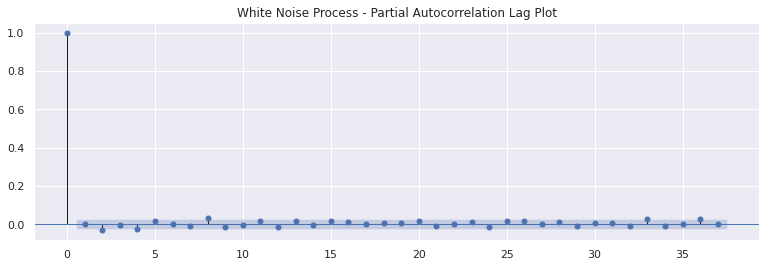

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series)
plt.title('White Noise Process - Partial Autocorrelation Lag Plot')
plt.show()

**Lag Plot**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


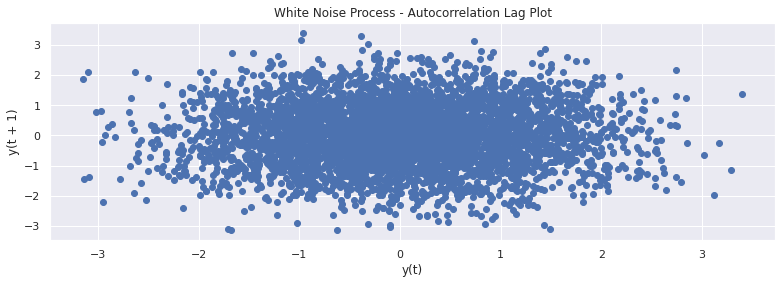

In [ ]:
from pandas.plotting import lag_plot
lag_plot(series)
plt.title('White Noise Process - Autocorrelation Lag Plot')
plt.show()

## **Statistical Tests**

**Durban-Watson Statistic**

* Is a test for autocorrelation in the residuals from a statistical regression analysis.
* The null hypothesis of the test is that there is no serial correlation
* This statistic will always be between 0 and 4. Closer to 0: evidence for positive serial correlation, closer to 4: negative serial correlation. 2 means no autocorrelation.

In [ ]:
# Durban-Watson Statistic. Value 2: no serial correlation. 0: positive correlation. 4: negative correlation
import statsmodels.api as sm
import statsmodels.tsa.stattools
statsmodels.stats.stattools.durbin_watson(series, axis=0)

array([1.99873153])

Test statistic is close to 2. There is no autocorrelation present.

**Ljung-Box Q Statistic**

* Ljung–Box test is an improved version of the Box–Pierce test
* Returns Ljung-Box Q-statistic for autocorrelation parameters and p-value
* Examining the null hypothesis of independence in a given time series.
* Instead of testing randomness at each distinct lag, it tests the "overall" randomness based on a number of lags, and is therefore a portmanteau test.
* The Ljung-Box Q (LBQ) statistic tests the null hypothesis that autocorrelations up to lag k equal zero (that is, the data values are random and independent up to a certain number of lags--in this case 12). 
* If the LBQ is greater than a specified critical value, autocorrelations for one or more lags might be significantly different from zero, indicating the values are not random and independent over time.
* https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/time-series/supporting-topics/diagnostic-checking/what-is-the-ljung-box-q-statistic/
* There are some strong voices in the Econometrics community against the validity of the Ljung-Box Q-statistic for testing for autocorrelation based on the residuals from an autoregressive model (i.e. with lagged dependent variables in the regressor matrix). The argument against the Ljung-Box test is the same as the one raised against another omnipresent autocorrelation test, the "Durbin-Watson" one: with lagged dependent variables in the regressor matrix, the test is biased in favor of maintaining the null hypothesis of "no-autocorrelation". Additionally there is a low power of the test.

In [ ]:
# Determine number of lags based on periods in time series for Ljung-Box test
# Formula: (Lags = (Number of Observations / 2) -2)
np.int_((periods/2)-2)

2498

This is the number of lags that needs to be integrated into the Ljung Box Test. Instead of inserting the final number manually, we'll add the formula for automatic determination.

In [ ]:
# Ljung-Box test of autocorrelation in residuals. H0: independence in a given time series
import statsmodels.api as sm
sm.stats.acorr_ljungbox(series.whitenoise, lags=[(np.int_((periods/2)-2))])

(array([2360.64190127]), array([0.97561779]))

P-value > zero. Do not reject H0. Series is independent.

**Breusch–Godfrey Test**

Some econometricians prefer the "Langrange Multiplier" test of Breusch and Godfrey.

In [ ]:
# statsmodels.stats.diagnostic.acorr_breusch_godfrey(series, nlags=None, store=False)

# **(Non) Stationarity in Time Series**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Create Example Data: (Gaussian) White Noise**

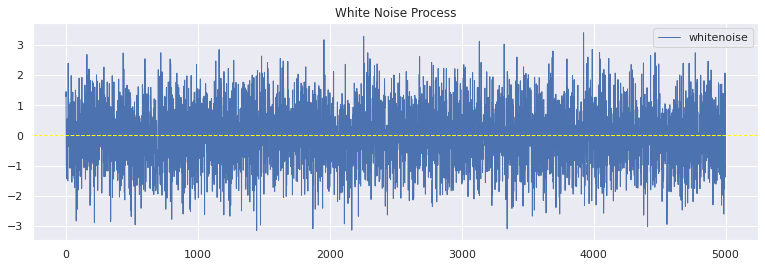

In [ ]:
from random import gauss
from random import seed
from pandas import Series

# Set seed for reproducibility and hyperparameter
seed(1)
mean = 0.0
sigma = 1.0
periods = 5000

# Create White Noise
whitenoise = [gauss(mean, sigma) for i in range(periods)]
whitenoise = pd.DataFrame(data=Series(whitenoise), columns=['whitenoise'])

# Create Time Series
ts = pd.date_range('2010-01-01', periods=periods, freq='D')
ts = pd.DataFrame(data=ts, columns=['ts'])

# Merge and Set Index
series = pd.concat([ts, whitenoise], axis=1).set_index('ts')

# Visualize
sns.set(rc={'figure.figsize':(13, 4), "lines.linewidth": 1.0})
whitenoise.plot(title='White Noise Process')
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.0)

## **Revelance**

**Revelance**

* Certain statistical tests demand stationarity (e.g. Granger causality test)
* Especially classic time series models demand stationarity, otherwise forecasts are biased.

**Weak (Second Order) Stationarity**

Following Statistical properties don’t change over time:
1. constant mean (i.e. kein upward Trend)
2. constant variance (i.e. keine zunehmende Volatilität)
3. covariance is independent of time



**Strong Stationarity**

* Strictly stationary if all aspects of its behavior are unchanged by shifts in time. A process is said to be strictly stationary if all aspects of its behavior are unchanged by shifts in time - Higher moments also do not change over time (skew, etc.). 
* Strong stationarity requires the shift-invariance (in time) of the finite-dimensional distributions of a stochastic process. This means that the distribution of a finite sub-sequence of random variables of the stochastic process remains the same as we shift it along the time index axis. For example, all i.i.d. stochastic processes are stationary.
* For many applications strict-sense stationarity is too restrictive. Other forms of stationarity such as wide-sense stationarity (second order) or N-th order stationarity are then employed. The definitions for different kinds of stationarity are not consistent among different authors (see Other terminology).


**General Time Series Forecasting**

* Stationarity is an assumption underlying many statistical procedures in TS: The stationary stochastic process is a building block of many econometric time series models. Many observed time series, however, have empirical features that are inconsistent with the assumptions of stationarity. 
* Non-stationary data are often transformed to become stationary (transformation is depending on type of non-stationarity)
* If your time series is nonstationary, then generally (!) there are no population counterparts of the sample ACF and PACF. Thus the sample ACF and PACF cannot converge to the population ACF and PACF. While you normally use the sample to make inference about the population or forecast a new sample from the population, nonstationarity does not allow to do that, because in general (!) there is no well-defined population to speak of (the population is changing, possibly unpredictably, with each new time point).
* You have your time series (𝑦𝑡). That time series has certain ACF and PACF. You don't know how the random variables that make up your time series look like, so you can't calculate the ACF and PACF from them. You do know however, some data sampled from those random variables. From that sample you can calculate the sample ACF and sample PACF. There are results from distribution theory that tell you that the sample ACF and sample PACF will be an approximation for the ACF and PACF of the time series. These results are valid under the assumption that the time series has the property of being stationary. Be aware that there are varying definitions of stationarity. You will have to figure out which one the author is referring to.

**In Financial Time Series**

Stationarity is the assumption that a random variable, or the distribution from which it's sampled, doesn't change in time. MPT assumes correlations measured in the past will be the same in the future. In reality, this is rarely true as there are market conditions where correlations break down (e.g., as they did in the Financial 15 index in South Africa).

* Often, stock prices are not a stationary process, since we might see a growing trend, or its volatility might increase over time (meaning that variance is changing).
* Viele ökonomische Zeitreihen enthalten einen Trend (oft Unit Root)
* AR(p)-Modelle mit einer Einheitswurzel können einen Trend erfassen
* Die meisten ökonomischen Einheitswurzel-Zeitreihen werden durch einmaliges Differenzieren stationär (d.h. die Zeitreihen sind I(1))
* Stationäre Zeitreihen werden oft als I(0) bezeichnet
* Ideally, we want to have a stationary time series for modelling. Of course, not all of them are stationary, but we can make different transformations to make them stationary.
* Stock prices follow a random walk, i.e., the price of a stock today is equal to its price yesterday plus a random shock. This is a nonstationary time-series. Any shock to the price of this stock is permanent and does not die out like an AR(1) process. (Under chapter 14.5: unit roots, in the book: econometrics).
* The stationary stochastic process is a building block of many econometric time series models. Many observed time series, however, have empirical features that are inconsistent with the assumptions of stationarity. 
* For example, the following plot shows quarterly U.S. GDP measured from 1947 to 2005. There is a very obvious upward trend in this series that one should incorporate into any model for the process.

**Types**

The most common cause of violation of stationarity is a trend in the mean, which can be due either to the presence of a unit root or of a deterministic trend. 
* Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
* Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

**Trend Stationary (deterministic)**

**Characteristica**
* Variance of the deterministic trend model does not change over time
* Any shock to the price of a stock will phase out / vanish.

**Approach**
* de-trend time series (i.e. log transform for exponential processes like GDP). Reduce trend by applying transformation (log, square root, cube root, etc). 
* Penalizes higher values more than smaller values to eliminate a significant positive trend. You can see then a trend in the data. 
* But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend. 
* Most common simple techniques used are (The simple trend reduction techniques don’t work in all cases, particularly the ones with high seasonality. use differencing and decomposition):
** Aggregation – taking average for a time period like monthly/weekly averages
** Smoothing (moving / rolling average) – take average of ‘k’ consecutive values depending on the frequency of time series, then subtract the rolling mean from the original series  and check again for stationarity with dickey fuller test. Types of smoothing: fixed k, time period strictly defined (but complex situations like forecasting a stock price, its difficult to come up with a number) AND ‘weighted moving average’ where more recent values are given a higher weight. - many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor. Hyperparameter: ‘halflife’ is used to define the amount of exponential decay (depends largely on the business domain). Other parameters like span and center of mass can also be used to define decay.
** Polynomial Fitting – fit a regression model



**Difference Stationary (stochastic)**

**Characteristica**
* Variance of the random walk with drift grows over time
* Any shock to the price of a stock is permanent and does not die out like an AR(1) process.

**Approach**
* difference the time series. Time series that can be made stationary by differencing are called integrated processes (Daher das Gegenteil: Differenzieren).
* Question: welche Ordnung Instationarität liegt vor? Ist ihre erste Differenz stationär, hat sie die Eigenschaft der Integration erster Ordnung.
* Unit root process: sub-type of difference stationary, integrated of order 1. 

## **Trend & Seasonality Plots**

**Time Series Decomposition**

The components are defined as follows:

* Level: The average value in the series.
* Trend: The increasing or decreasing value in the series.
* Seasonality: The repeating short-term cycle in the series.
* Noise: The random variation in the series.

**Additive Model**
* y(t) = Level + Trend + Seasonality + Noise 1 y(t) = Level + Trend + Seasonality + Noise
* An additive model is linear where changes over time are consistently made by the same amount. A linear trend is a straight line. A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

**Multiplicative Model**
* y(t) = Level Trend Seasonality Noise 1 y(t) = Level Trend Seasonality Noise
* A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time. A nonlinear trend is a curved line. A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time

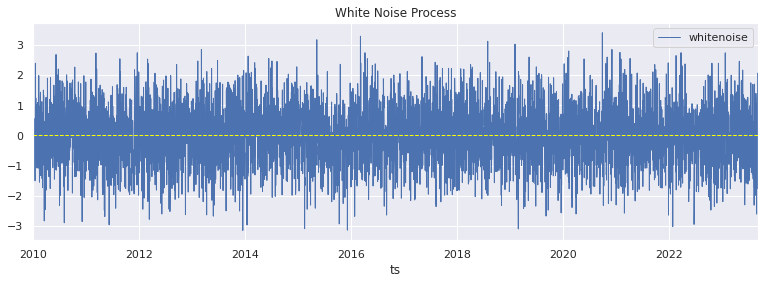

In [ ]:
# Original Time Series
sns.set(rc={'figure.figsize':(13, 4), "lines.linewidth": 1.0})
series.plot(title='White Noise Process')
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.0)

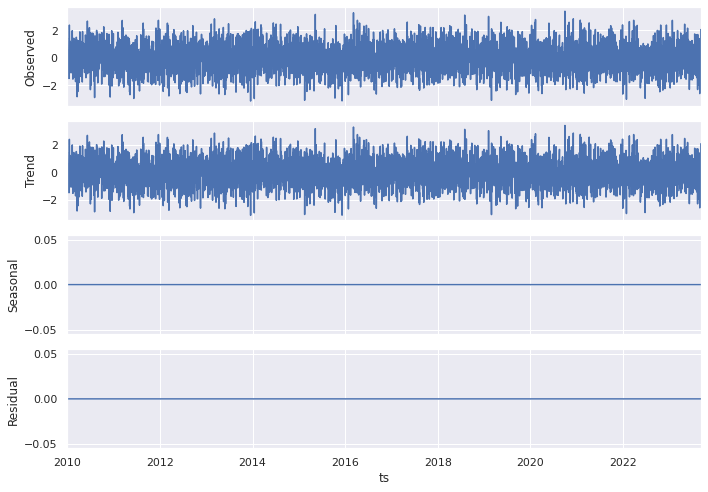

In [ ]:
# Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(rc={'figure.figsize':(10, 7)})
decompose = series
result = seasonal_decompose(decompose, model='additive', freq=1) # or multiplicative
# print(result.trend)
# print(result.seasonal)
# print(result.resid)
# print(result.observed)
result.plot()
plt.show()

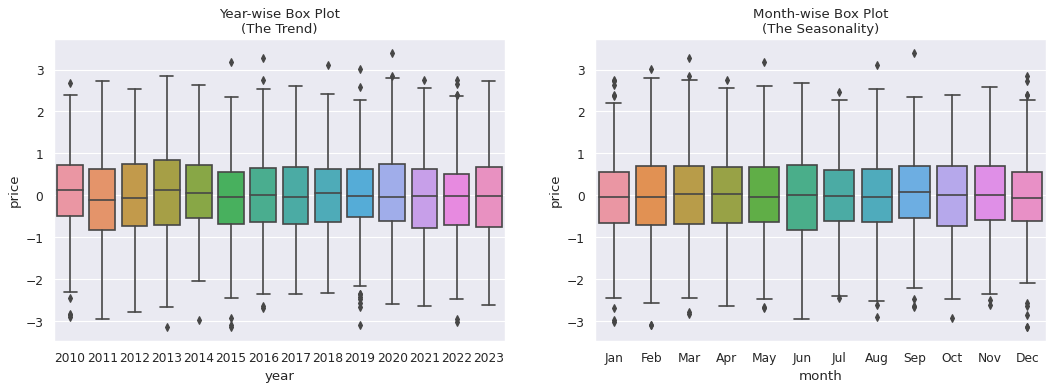

In [ ]:
# Import Data
seasonal_plots = series.copy()

# Transform Series
seasonal_plots.reset_index(inplace=True)
seasonal_plots = seasonal_plots.rename(columns={"ts": "date", "whitenoise" : "price"})

# Prepare Data
seasonal_plots['year'] = [d.year for d in seasonal_plots.date]
seasonal_plots['month'] = [d.strftime('%b') for d in seasonal_plots.date]
years = seasonal_plots['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(16,5), dpi= 80)
sns.boxplot(x='year', y='price', data=seasonal_plots, ax=axes[0])
sns.boxplot(x='month', y='price', data=seasonal_plots.loc[~seasonal_plots.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=12); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=12)

plt.show()

As expected no trend or seasonality visible in both of plots.

## **Statistical Tests**

**Augmented Dickey Fuller**

* The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.
* H0: There is a unit root for the series (non stationary).

Choose regression {‘c’,’ct’,’ctt’,’nc’} - Constant and trend order to include in regression.
* ‘c’ : constant only (default).
* 'ct’ : constant and trend.
* ctt’ : constant, and linear and quadratic trend.
* 'nc’ : no constant, no trend.

In [ ]:
# Augmented Dickey Fuller. H0: There is a unit root for the series (non stationary)
from statsmodels.tsa.stattools import adfuller
adfuller(series.whitenoise, maxlag=None, regression='ctt', autolag='AIC', store=False, regresults=False)

(-51.655529537354894,
 0.0,
 1,
 4998,
 {'1%': -4.373450004009452,
  '10%': -3.553992425283714,
  '5%': -3.8335721135923864},
 14024.439778510303)

P-value is zero. Reject H0. Series is stationary.

**KPSS Test**

* Kwiatkowski-Phillips-Schmidt-Shin to test if time series is stationarity. Computes the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for the null hypothesis that x is level or trend stationary. Stationarity Test: KPSS
* H0: Series has no unit root (is stationary or a deterministic trend). Ha: Series is not stationary
* Reject H0 if  p-value of less than 5% and test stats higher than provided critical values

**Cautions**

* A major disadvantage for the KPSS test is that it has a high rate of Type I errors (it tends to reject the null hypothesis too often). If attempts are made to control these errors (by having larger p-values), then that negatively impacts the test’s power.

* One way to deal with the potential for high Type I errors is to combine the KPSS with an ADF test. If the result from both tests suggests that the time series in stationary, then it probably is.

* https://www.statisticshowto.datasciencecentral.com/kpss-test/

**KPSS - Level Stationarity Test**

* ‘c’ : The data is stationary around a constant (default).
* H0 = Stationary (Stochastic Trend). H1 = Non-Stationary (Unit Root)
* Reject H0 if p-value of less than 5% and test stats higher than provided critical values

In [ ]:
# KPSS - Level Stationarity Test. H0 = Stationary (Stochastic Trend). H1 = Non-Stationary (Unit Root)
import statsmodels.tsa.stattools
statsmodels.tsa.stattools.kpss(series.whitenoise, regression='c', lags='auto', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.09474034815631913,
 0.1,
 6,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

Test statistics at 0.07 is not more extreme than the provided critical value of 0.46 for 5%. p-value is not below 0.05. Do not reject H0. Process is stationary around a constant.


**KPSS - Trend Stationary Test**

* ‘ct’ : The data is stationary around a trend.
* H0 = Deterministic Trend. H1 = Non-Stationary (Unit Root)
* Reject H0 if p-value of less than 5% and test stats higher than provided critical values

In [ ]:
# KPSS - Trend Stationary Test. H0 = Deterministic Trend. H1 = Non-Stationary (Unit Root)
import statsmodels.tsa.stattools
statsmodels.tsa.stattools.kpss(series.whitenoise, regression='ct', lags='auto', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.049288217112185145,
 0.1,
 6,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

Test statistics is smaller than provided critical value of 0.146. p-value is at 0.1 (“not significant”). Do not reject H0.

Summary: Both test show no unit root. Time series is either trend or level stationary.

**Zivot-Andrews Structural-break**

* Unit root tests can be wrong if a structural break occurred in timeseries. Zivot-Andrews test checks for structural Break Unit Root.
* H0 = unit root with a single structural break

In [ ]:
# Determine number of lags required for Zivot-Andrews test
np.int_(12*(periods/100)**(1/4))

31

In [ ]:
# Zivot-Andrews Structural-break Test
import statsmodels.tsa.stattools
# statsmodels.tsa.stattools.zivot_andrews(series.whitenoise, maxlag=(np.int_(12*(periods/100)**(1/4))), regression='ct', autolag='AIC')
# https://www.statsmodels.org/devel/generated/statsmodels.tsa.stattools.zivot_andrews.html
# statsmodels.__version__

# **Distribution**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Create Example Data: (Gaussian) White Noise**

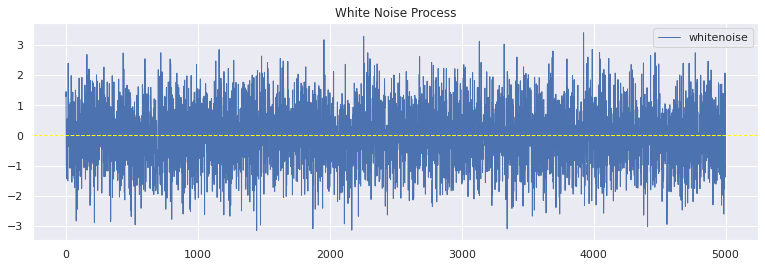

In [ ]:
from random import gauss
from random import seed
from pandas import Series

# Set seed for reproducibility and hyperparameter
seed(1)
mean = 0.0
sigma = 1.0
periods = 5000

# Create White Noise
whitenoise = [gauss(mean, sigma) for i in range(periods)]
whitenoise = pd.DataFrame(data=Series(whitenoise), columns=['whitenoise'])

# Create Time Series
ts = pd.date_range('2010-01-01', periods=periods, freq='D')
ts = pd.DataFrame(data=ts, columns=['ts'])

# Merge and Set Index
series = pd.concat([ts, whitenoise], axis=1).set_index('ts')

# Visualize
sns.set(rc={'figure.figsize':(13, 4), "lines.linewidth": 1.0})
whitenoise.plot(title='White Noise Process')
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.0)

* Gaussian White Noise Processes are drawn from a normal distribution. This should be reflected in distribution plots and goodness of fit nests.
* Generally it is good to know the underlying distribution of processes for example when constructing a better (custom) activation function or cost function.

## **Values**

In [ ]:
series.describe(percentiles=[0.05, 0.95])

,whitenoise
count,5000.000000
mean,-0.000236
std,0.991748
min,-3.149965
5%,-1.663347
50%,-0.006930
95%,1.656811
max,3.400552


Mean is nearly 0.0 and the standard deviation is nearly 1.0. Some variance is expected given the small size of the sample. If we had more data, it might be more interesting to split the series in half and calculate and compare the summary statistics for each half. We would expect to see a similar mean and standard deviation for each sub-series.

In [ ]:
# First central moment: Mean
series.mean()

whitenoise   -0.000236
dtype: float64

In [ ]:
# Second central moment: Variance
series.var()

whitenoise    0.983565
dtype: float64

In [ ]:
# Third central moment: Skewness ('Higher moment')
series.skew()

whitenoise   -0.001609
dtype: float64

In [ ]:
# Forth central moment: Kurtosis ('Higher moment')
series.kurt()

whitenoise   -0.090712
dtype: float64

In [ ]:
# Compute specific percentiles
series.quantile(0.75)

whitenoise    0.667429
Name: 0.75, dtype: float64

## **Distribution Plots**

**Distribution Plot**

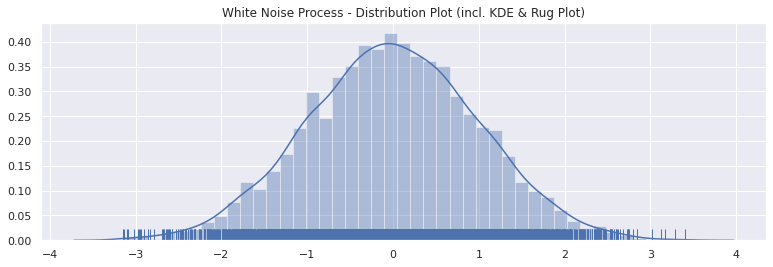

In [ ]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((series), hist=True, rug=True).set_title('White Noise Process - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

**KDE Plot**

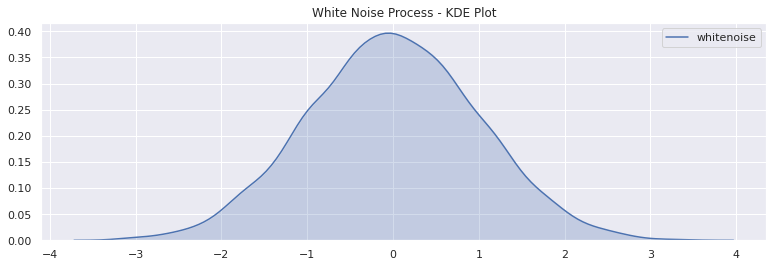

In [ ]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.kdeplot(series.whitenoise, shade=True).set_title('White Noise Process - KDE Plot')
plt.show()

**Boxplot**

Text(0.5, 1.0, 'White Noise Process - Boxplot')

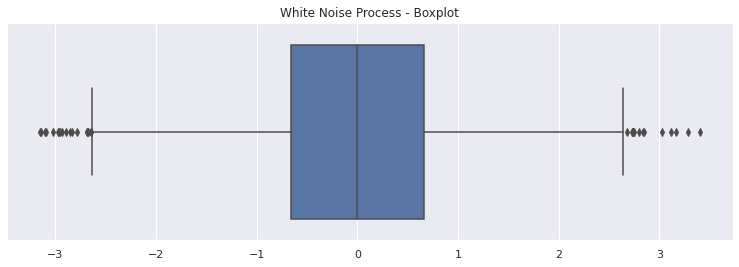

In [ ]:
sns.boxplot(series).set_title('White Noise Process - Boxplot')

**QQ Plot**

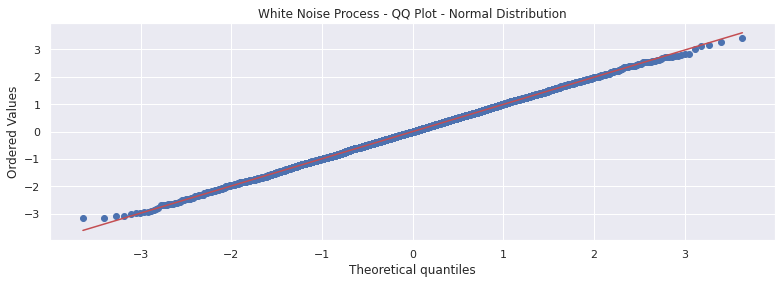

In [ ]:
import scipy
from scipy import stats
stats.probplot(series.whitenoise, dist="norm", plot=plt)
plt.title('White Noise Process - QQ Plot - Normal Distribution')
plt.show()

## **Statistical Tests (Goodness of Fit)**

**Normal Test**

* Test whether a sample differs from a normal distribution.
* This function tests the null hypothesis that a sample comes from a normal distribution. 
* It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality.
* Historically, the third and fourth standardized moments (skewness and kurtosis) were some of the earliest tests for normality.

In [ ]:
# Normal Test. H0: sample comes from a normal distribution
import scipy
from scipy import stats
stats.normaltest(series)

NormaltestResult(statistic=array([1.7988695]), pvalue=array([0.40679954]))

**Shapiro–Wilk Test**

* tests the null hypothesis that the data was drawn from a normal distribution.
* Monte Carlo simulation has found that Shapiro–Wilk has the best power for a given significance, followed closely by Anderson–Darling when comparing the Shapiro–Wilk, Kolmogorov–Smirnov, Lilliefors and Anderson–Darling tests.
* For N > 5000 the W test statistic is accurate but the p-value may not be.
* The chance of rejecting the null hypothesis when it is true is close to 5% regardless of sample size.

In [ ]:
# Shapiro–Wilk Test. H0: data was drawn from a normal distribution
import scipy
from scipy import stats
stats.shapiro(series.whitenoise)

(0.9996960163116455, 0.6947302222251892)

**Anderson-Darling Test**

* Anderson Darling tests the null hypothesis whether the sample from the population follows a particular distribution (default: normal).
* For the Anderson-Darling test, the critical values depend on which distribution is being tested against. 
* This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.



In [ ]:
# Anderson-Darling Test. H0: sample from the population follows a particular distribution (default: normal)
import scipy
from scipy import stats
stats.anderson(series.whitenoise)

AndersonResult(statistic=0.17225517577207938, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

**Kolmogorov-Smirnov Test**

* Test of the distribution G(x) of an observed random variable against a given distribution F(x) (quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples.)
* Under null hypothesis the two distributions are identical, G(x)=F(x).
* Only works if the mean and the variance of the normal are assumed known under the null hypothesis

In [ ]:
# Kolmogorov-Smirnov Test. H0: The two distributions are identical (e.g. against normal)
import scipy
from scipy import stats
stats.kstest(series, 'norm')

KstestResult(statistic=0.9996637501786144, pvalue=0.0)

**Jarque-Bera Test**

* Compares sample skewness and kurtosis to 0 and 3, their values under normality.
* This test only works for a large enough number of data samples (>2000) as the test statistic asymptotically has a Chi-squared distribution with 2 degrees of freedom.
* Null hypothesis: sample is normal distributed.
* The test has weakness. In particular, the test has low power for distributions with short tails, especially for bimodal distributions. Some authors have declined to include its results in their studies because of its poor overall performance

In [ ]:
# Jarque-Bera Test. H0: sample is normal distributed
import scipy
from scipy import stats
stats.jarque_bera(series)

(1.7586207168611774, 0.41506906187895287)

All P-values > 0.05. Don't reject any HO. Distribution is normal

# **Transformation**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Create Example Data: (Gaussian) White Noise**

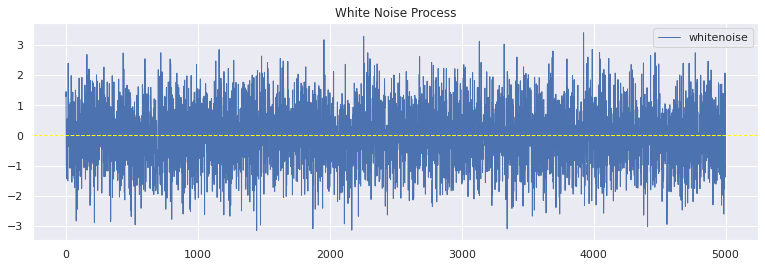

In [ ]:
from random import gauss
from random import seed
from pandas import Series

# Set seed for reproducibility and hyperparameter
seed(1)
mean = 0.0
sigma = 1.0
periods = 5000

# Create White Noise
whitenoise = [gauss(mean, sigma) for i in range(periods)]
whitenoise = pd.DataFrame(data=Series(whitenoise), columns=['whitenoise'])

# Create Time Series
ts = pd.date_range('2010-01-01', periods=periods, freq='D')
ts = pd.DataFrame(data=ts, columns=['ts'])

# Merge and Set Index
series = pd.concat([ts, whitenoise], axis=1).set_index('ts')

# Visualize
sns.set(rc={'figure.figsize':(13, 4), "lines.linewidth": 1.0})
whitenoise.plot(title='White Noise Process')
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.0)

* Following transformations are possible to make a time series stationary
* Differencing is appied for stochastic / difference stationary processes
* Log, square root etc can be applied on deterministic trends
* After each transformation you can look at the distribution plot, QQ plot, autocorrelation plot and conduct normal distribution test, Augmented Dickey Fuller & KPSS test, to check if there is still a signal left.
* Of course a transformation of white noise processes will not change that there is no predictable pattern. This part is purely for completeness applicable at non-white noise processes.

## **Difference**

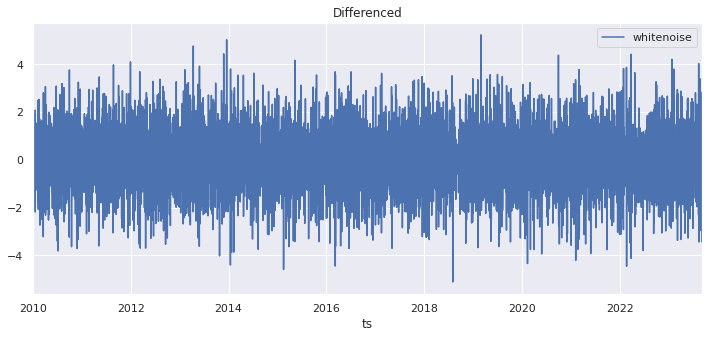

In [ ]:
# Differenced
differenced = series - series.shift(1)
differenced.plot(title='Differenced')

## **Percentage Difference**

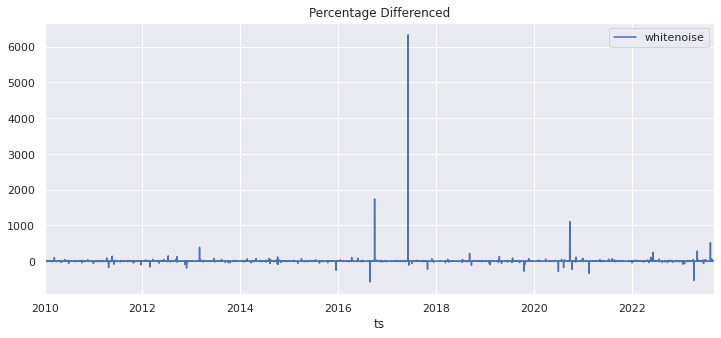

In [ ]:
# Percentage Differenced
percentage = series / series.shift(1) -1
percentage.plot(title='Percentage Differenced')

## **Log Return**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


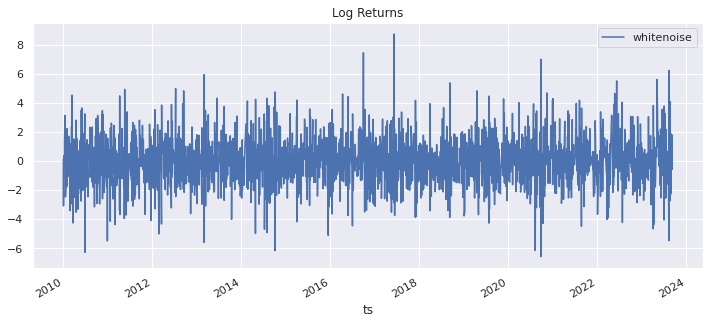

In [ ]:
# Log Return
lr = np.log(series/series.shift(1)).dropna()
lr.plot(title='Log Returns')

## **Square Root**

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


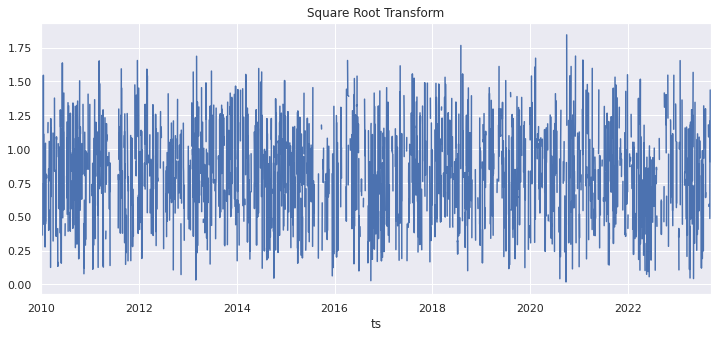

In [ ]:
# Square Root Transform
sr = np.sqrt(series.whitenoise)
sr.plot(title='Square Root Transform')

## **First Derivative**

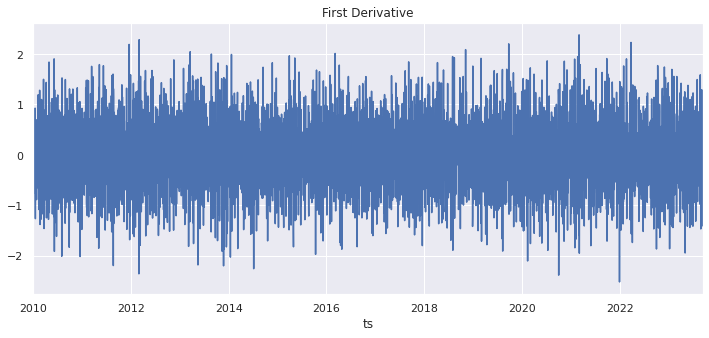

In [ ]:
# First Derivative
fd = pd.Series(np.gradient(series.whitenoise), series.whitenoise.index, name='slope')
fd.plot(title='First Derivative')

# **Uncertainty Quantification**

In [ ]:
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import tensorflow_probability as tfp

sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)

%matplotlib inline

tfd = tfp.distributions

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Introduction**

Uncertainty quantification (UQ) is the science of quantitative characterization and reduction of uncertainties in both computational and real world applications. It tries to determine how likely certain outcomes are if some aspects of the system are not exactly known. Computer simulations are the most common approach to study problems in uncertainty quantification (read more: ['Uncertainty Quantification'](https://en.m.wikipedia.org/wiki/Uncertainty_quantification)).

**Sources of Uncertainty**

* Parameter: model parameters that are inputs to the model but whose exact values are unknown to experimentalists and cannot be controlled in physical experiments, or whose values cannot be exactly inferred by statistical methods.
* Parametric: comes from the variability of input variables of the model.
* Structural: Also known as model inadequacy, model bias, or model discrepancy, this comes from the lack of knowledge of the underlying physics in the problem.
* Algorithmic: known as numerical uncertainty, or discrete uncertainty. This type comes from numerical errors and numerical approximations per implementation of the computer model. Most models are too complicated to solve exactly.
* Experimental: observation error, this comes from the variability of experimental measurements. 
* Interpolation: lack of available data collected from computer model simulations and/or experimental measurements. For other input settings that don't have simulation data or experimental measurements, one must interpolate or extrapolate in order to predict the corresponding responses.

**Types of Uncertainty Quantification Problems**

1. forward propagation of uncertainty (where the various sources of uncertainty are propagated through the model to predict the overall uncertainty in the system response) 

2. inverse assessment of model uncertainty and parameter uncertainty (where the model parameters are calibrated simultaneously using test data). Getting increasing attention in the engineering design community, since uncertainty quantification of a model and the subsequent predictions of the true system response(s) are of great interest in designing robust systems.

For more details see ['Two types of uncertainty quantification problems'](https://en.m.wikipedia.org/wiki/Uncertainty_quantification#Two_types_of_uncertainty_quantification_problems), as well as ['Propagation of uncertainty'](https://en.m.wikipedia.org/wiki/Propagation_of_uncertainty) and ['Inverse Problem'](https://en.m.wikipedia.org/wiki/Inverse_problem).

*The following code examples to show how to fit regression models using TFP's 'probabilistic layers' are taken from this [Github](https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Probabilistic_Layers_Regression.ipynb). Also read the article on ['Regression with Probabilistic Layers in TensorFlow Probability'](https://blog.tensorflow.org/2019/03/regression-with-probabilistic-layers-in.html).*

## **Motivation & Data**

Use **TensorFlow Probabilistic Layers** to specify a probabilistic model (here: linear regression), and then simply minimize the negative log-likelihood. The **negative log-likelihood loss** function is (often used in combination with a SoftMax activation function) to define how well your neural network classifies data. The negative log-likelihood function is defined as **loss (y) = -log(y)** and produces a high value when the values of the output layer are evenly distributed and low.

In [ ]:
negloglik = lambda y, rv_y: -rv_y.log_prob(y)

In [ ]:
# Synthesize dataset

w0 = 0.125
b0 = 5.
x_range = [-20, 60]

def load_dataset(n=150, n_tst=150):
  np.random.seed(43)
  def s(x):
    g = (x - x_range[0]) / (x_range[1] - x_range[0])
    return 3 * (0.25 + g**2.)
  x = (x_range[1] - x_range[0]) * np.random.rand(n) + x_range[0]
  eps = np.random.randn(n) * s(x)
  y = (w0 * x * (1. + np.sin(x)) + b0) + eps
  x = x[..., np.newaxis]
  x_tst = np.linspace(*x_range, num=n_tst).astype(np.float32)
  x_tst = x_tst[..., np.newaxis]
  return y, x, x_tst

y, x, x_tst = load_dataset()

**Ideal Case: No Uncertainty**

In [ ]:
# Build model.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)),
])

# Do inference.
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
model.fit(x, y, epochs=1000, verbose=False);

# Profit.
print(np.squeeze(w.numpy()) for w in model.weights)
yhat = model(x_tst)
assert isinstance(yhat, tfd.Distribution)

<generator object <genexpr> at 0x7f73716866d0>


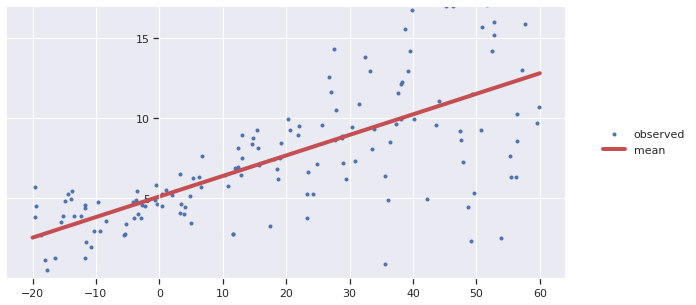

In [ ]:
# Figure 1: No uncertainty

w = np.squeeze(model.layers[-2].kernel.numpy())
b = np.squeeze(model.layers[-2].bias.numpy())

#plt.figure(figsize=[6, 1.5])  # inches
sns.set(rc={'figure.figsize':(10, 5), "lines.linewidth": 1.0})

#plt.figure(figsize=[8, 5])  # inches
plt.plot(x, y, 'b.', label='observed');
plt.plot(x_tst, yhat.mean(),'r', label='mean', linewidth=4);
plt.ylim(-0.,17);
plt.yticks(np.linspace(0, 15, 4)[1:]);
plt.xticks(np.linspace(*x_range, num=9));

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))

# plt.savefig('/tmp/fig1.png', bbox_inches='tight', dpi=300)

## **Aleatoric Uncertainty (Known Unknowns)**

Aleatoric uncertainty is also known as statistical uncertainty, and is representative of unknowns that differ each time we run the same experiment. For example, a single arrow shot with a mechanical bow that exactly duplicates each launch (the same acceleration, altitude, direction and final velocity) will not all impact the same point on the target due to random and complicated vibrations of the arrow shaft, the knowledge of which cannot be determined sufficiently to eliminate the resulting scatter of impact points. 

**Approach**

In the previous section we’ve seen that there is variability in y for any particular value of x. We can treat this variability as being inherent to the problem. This means that even if we had an infinite training set, we still wouldn’t be able to predict the labels perfectly. A common example of this kind of uncertainty is the outcome of a fair coin flip (assuming you are not equipped with a detailed model of physics etc.). No matter how many flips we’ve seen in the past, we cannot predict what the flip will be in the future.

We will assume that this variability has a known functional relationship to the value of x. Let us model this relationship using the same linear function as we did for the mean of y.

In [ ]:

# Build model.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1 + 1),
  tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1],
                           scale=1e-3 + tf.math.softplus(0.05 * t[...,1:]))),
])

# Do inference.
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
model.fit(x, y, epochs=1000, verbose=False);

# Profit.
print(np.squeeze(w.numpy()) for w in model.weights)
yhat = model(x_tst)
assert isinstance(yhat, tfd.Distribution)

<generator object <genexpr> at 0x7f73716866d0>


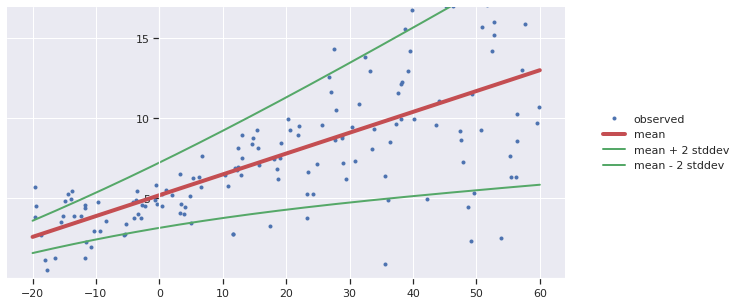

In [ ]:
# Figure 2: Aleatoric Uncertainty
# plt.figure(figsize=[6, 1.5])  # inches
sns.set(rc={'figure.figsize':(10, 5), "lines.linewidth": 1.0})
plt.plot(x, y, 'b.', label='observed');

m = yhat.mean()
s = yhat.stddev()

plt.plot(x_tst, m, 'r', linewidth=4, label='mean');
plt.plot(x_tst, m + 2 * s, 'g', linewidth=2, label=r'mean + 2 stddev');
plt.plot(x_tst, m - 2 * s, 'g', linewidth=2, label=r'mean - 2 stddev');

plt.ylim(-0.,17);
plt.yticks(np.linspace(0, 15, 4)[1:]);
plt.xticks(np.linspace(*x_range, num=9));

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))

plt.savefig('/tmp/fig2.png', bbox_inches='tight', dpi=300)

Better: the model is now less certain about what y should be as x gets larger. This kind of uncertainty is called aleatoric uncertainty, because it represents variation inherent to the underlying process . Though we’ve made progress, aleatoric uncertainty is not the only source of uncertainty in this problem. Before going further, let us consider the other source of uncertainty that we’ve hitherto ignored.

## **Epistemic Uncertainty (Unknown Unknowns)**

Epistemic uncertainty is also known as systematic uncertainty, and is due to things one could in principle know but do not in practice. This may be because a measurement is not accurate, because the model neglects certain effects, or because particular data has been deliberately hidden.

**Approach**

The noise in the data means that we can not be fully certain of the parameters of the linear relationship between x and y. For example, the slope we’ve found in the previous section seems reasonable, but we don’t know for sure, and perhaps a slightly shallower or steeper slope would also be reasonable. This kind of uncertainty is called the epistemic uncertainty; unlike aleatoric uncertainty, epistemic uncertainty can be reduced if we get more data. To get a sense of this uncertainty we shall replace the standard Keras Dense layer with TFP’s DenseVariational layer.

The DenseVariational layer uses a variational posterior Q(w) over the weights to represent the uncertainty in their values. This layer regularizes Q(w) to be close to the prior distribution P(w), which models the uncertainty in the weights before we look into the data.

For Q(w) we’ll use a multivariate normal distribution for the variational posterior with a trainable diagonal covariance matrix centered on a trainable location. For P(w) we’ll use a standard multivariate normal distribution for the prior with a trainable location and fixed scale. See Appendix B for more details about how this layer works.

In [ ]:
# Specify the surrogate posterior over `keras.layers.Dense` `kernel` and `bias`.
def posterior_mean_field(kernel_size, bias_size=0, dtype=None):
  n = kernel_size + bias_size
  c = np.log(np.expm1(1.))
  return tf.keras.Sequential([
      tfp.layers.VariableLayer(2 * n, dtype=dtype),
      tfp.layers.DistributionLambda(lambda t: tfd.Independent(
          tfd.Normal(loc=t[..., :n],
                     scale=1e-5 + tf.nn.softplus(c + t[..., n:])),
          reinterpreted_batch_ndims=1)),
  ])

In [ ]:
# Specify the prior over `keras.layers.Dense` `kernel` and `bias`.
def prior_trainable(kernel_size, bias_size=0, dtype=None):
  n = kernel_size + bias_size
  return tf.keras.Sequential([
      tfp.layers.VariableLayer(n, dtype=dtype),
      tfp.layers.DistributionLambda(lambda t: tfd.Independent(
          tfd.Normal(loc=t, scale=1),
          reinterpreted_batch_ndims=1)),
  ])

In [ ]:
# Build model.
model = tf.keras.Sequential([
  tfp.layers.DenseVariational(1, posterior_mean_field, prior_trainable, kl_weight=1/x.shape[0]),
  tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)),
])

# Do inference.
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
model.fit(x, y, epochs=1000, verbose=False);

# Profit.
print(np.squeeze(w.numpy()) for w in model.weights)
yhat = model(x_tst)
assert isinstance(yhat, tfd.Distribution)

<generator object <genexpr> at 0x7f736e701728>


Despite the complexity of the algorithms involved, using the DenseVariational layer is simple. One interesting aspect of the code above is that when we make predictions using a model with such a layer, we get a different answer every time we do so. This is because DenseVariational essentially defines an ensemble of models. Let us see what this ensemble tells us about the parameters of our model.

In [ ]:
# Figure 3: Epistemic Uncertainty
# plt.figure(figsize=[6, 1.5])  # inches
sns.set(rc={'figure.figsize':(10, 5), "lines.linewidth": 1.0})
plt.clf();
plt.plot(x, y, 'b.', label='observed');

yhats = [model(x_tst) for _ in range(100)]
avgm = np.zeros_like(x_tst[..., 0])
for i, yhat in enumerate(yhats):
  m = np.squeeze(yhat.mean())
  s = np.squeeze(yhat.stddev())
  if i < 25:
    plt.plot(x_tst, m, 'r', label='ensemble means' if i == 0 else None, linewidth=0.5)
  avgm += m
plt.plot(x_tst, avgm/len(yhats), 'r', label='overall mean', linewidth=4)

plt.ylim(-0.,17);
plt.yticks(np.linspace(0, 15, 4)[1:]);
plt.xticks(np.linspace(*x_range, num=9));

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))

plt.savefig('/tmp/fig3.png', bbox_inches='tight', dpi=300)

Each line represents a different random draw of the model parameters from the posterior distribution. As we can see, there is in fact quite a bit of uncertainty about the linear relationship. Even if we don’t care about the variability of y for any particular value of x, the uncertainty in the slope should give us pause if we’re making predictions for x’s too far from 0.

Note that in this example we are training both P(w) and Q(w). This training corresponds to using Empirical Bayes or Type-II Maximum Likelihood. We used this method so that we wouldn’t need to specify the location of the prior for the slope and intercept parameters, which can be tough to get right if we do not have prior knowledge about the problem. Moreover, if you set the priors very far from their true values, then the posterior may be unduly affected by this choice. A caveat of using Type-II Maximum Likelihood is that you lose some of the regularization benefits over the weights. If you wanted to do a proper Bayesian treatment of uncertainty (if you had some prior knowledge, or a more sophisticated prior), you could use a non-trainable prior.

## **Aleatoric & Epistemic Uncertainty**

In real life applications, both kinds of uncertainties are present. Uncertainty quantification intends to work toward reducing epistemic uncertainties to aleatoric uncertainties. 

The **quantification for the aleatoric uncertainties** can be relatively straightforward to perform, depending on the application. Techniques such as the Monte Carlo method are frequently used. A probability distribution can be represented by its moments (in the Gaussian case, the mean and covariance suffice, although, in general, even knowledge of all moments to arbitrarily high order still does not specify the distribution function uniquely), or more recently, by techniques such as Karhunen–Loève and polynomial chaos expansions. 

To **evaluate epistemic uncertainties**, the efforts are made to gain better knowledge of the system, process or mechanism. Methods such as probability bounds analysis, fuzzy logic or evidence theory (Dempster–Shafer theory – a generalization of the Bayesian theory of subjective probability) are used.

In [ ]:
# Build model.
model = tf.keras.Sequential([
  tfp.layers.DenseVariational(1 + 1, posterior_mean_field, prior_trainable, kl_weight=1/x.shape[0]),
  tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1],
                           scale=1e-3 + tf.math.softplus(0.01 * t[...,1:]))),
])

# Do inference.
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
model.fit(x, y, epochs=1000, verbose=False);

# Profit.
print(np.squeeze(w.numpy()) for w in model.weights)
yhat = model(x_tst)
assert isinstance(yhat, tfd.Distribution)

<generator object <genexpr> at 0x7f0f2b3745c8>


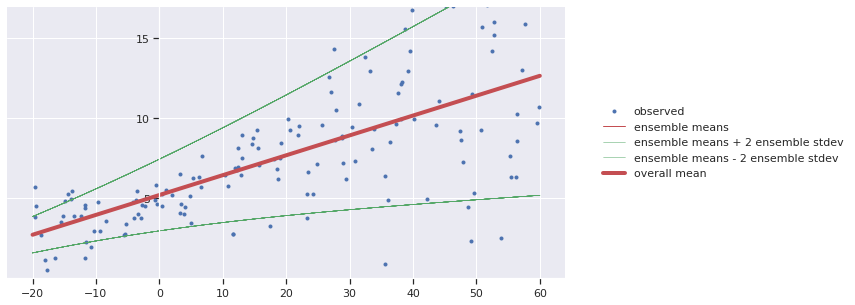

In [ ]:
# Figure 4: Both Aleatoric & Epistemic Uncertainty
# plt.figure(figsize=[6, 1.5])  # inches
sns.set(rc={'figure.figsize':(10, 5), "lines.linewidth": 1.0})
plt.plot(x, y, 'b.', label='observed');

yhats = [model(x_tst) for _ in range(100)]
avgm = np.zeros_like(x_tst[..., 0])
for i, yhat in enumerate(yhats):
  m = np.squeeze(yhat.mean())
  s = np.squeeze(yhat.stddev())
  if i < 15:
    plt.plot(x_tst, m, 'r', label='ensemble means' if i == 0 else None, linewidth=1.)
    plt.plot(x_tst, m + 2 * s, 'g', linewidth=0.5, label='ensemble means + 2 ensemble stdev' if i == 0 else None);
    plt.plot(x_tst, m - 2 * s, 'g', linewidth=0.5, label='ensemble means - 2 ensemble stdev' if i == 0 else None);
  avgm += m
plt.plot(x_tst, avgm/len(yhats), 'r', label='overall mean', linewidth=4)

plt.ylim(-0.,17);
plt.yticks(np.linspace(0, 15, 4)[1:]);
plt.xticks(np.linspace(*x_range, num=9));

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))

plt.savefig('/tmp/fig4.png', bbox_inches='tight', dpi=300)

## **Functional Uncertainty**

Functional uncertainty quantification (FunUQ) was recently proposed to quantify uncertainties in models and simulations that originate from input functions, as opposed to parameters.

In [ ]:
# Custom PSD Kernel
class RBFKernelFn(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super(RBFKernelFn, self).__init__(**kwargs)
    dtype = kwargs.get('dtype', None)

    self._amplitude = self.add_variable(
            initializer=tf.constant_initializer(0),
            dtype=dtype,
            name='amplitude')
    
    self._length_scale = self.add_variable(
            initializer=tf.constant_initializer(0),
            dtype=dtype,
            name='length_scale')

  def call(self, x):
    # Never called -- this is just a layer so it can hold variables
    # in a way Keras understands.
    return x

  @property
  def kernel(self):
    return tfp.math.psd_kernels.ExponentiatedQuadratic(
      amplitude=tf.nn.softplus(0.1 * self._amplitude),
      length_scale=tf.nn.softplus(5. * self._length_scale)
    )

In [ ]:
# For numeric stability, set the default floating-point dtype to float64
tf.keras.backend.set_floatx('float64')

# Build model.
num_inducing_points = 40
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[1]),
    tf.keras.layers.Dense(1, kernel_initializer='ones', use_bias=False),
    tfp.layers.VariationalGaussianProcess(
        num_inducing_points=num_inducing_points,
        kernel_provider=RBFKernelFn(),
        event_shape=[1],
        inducing_index_points_initializer=tf.constant_initializer(
            np.linspace(*x_range, num=num_inducing_points,
                        dtype=x.dtype)[..., np.newaxis]),
        unconstrained_observation_noise_variance_initializer=(
            tf.constant_initializer(np.array(0.54).astype(x.dtype))),
    ),
])

# Do inference.
batch_size = 32
loss = lambda y, rv_y: rv_y.variational_loss(
    y, kl_weight=np.array(batch_size, x.dtype) / x.shape[0])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=loss)
model.fit(x, y, batch_size=batch_size, epochs=1000, verbose=False)

# Profit.
yhat = model(x_tst)
assert isinstance(yhat, tfd.Distribution)

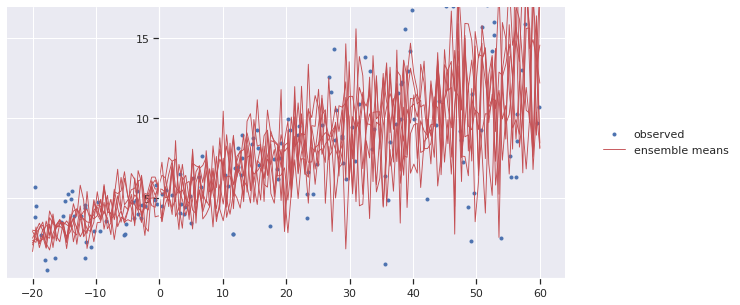

In [ ]:
# Figure 5: Functional Uncertainty

y, x, _ = load_dataset()

# plt.figure(figsize=[6, 1.5])  # inches
sns.set(rc={'figure.figsize':(10, 5), "lines.linewidth": 1.0})
plt.plot(x, y, 'b.', label='observed');

num_samples = 7
for i in range(num_samples):
  sample_ = yhat.sample().numpy()
  plt.plot(x_tst,
           sample_[..., 0].T,
           'r',
           linewidth=0.9,
           label='ensemble means' if i == 0 else None);

plt.ylim(-0.,17);
plt.yticks(np.linspace(0, 15, 4)[1:]);
plt.xticks(np.linspace(*x_range, num=9));

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))

plt.savefig('/tmp/fig5.png', bbox_inches='tight', dpi=300)

# **Time Series Forecasting**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
print('Tensorflow version %s' % tf.__version__)

## **Exploration**

In [ ]:
url = 'https://raw.githubusercontent.com/deltorobarba/machinelearning/master/google.csv'
data = pd.read_csv(url)
series = data[['Date', 'Close']].rename(columns={"Date": "date", "Close": "values"}).set_index('date')
series.index = pd.to_datetime(series.index, utc=False)
series.head()

,values
date,
2010-02-01,265.514771
2010-02-02,264.568329
2010-02-03,269.400208
2010-02-04,262.406433
2010-02-05,264.653015


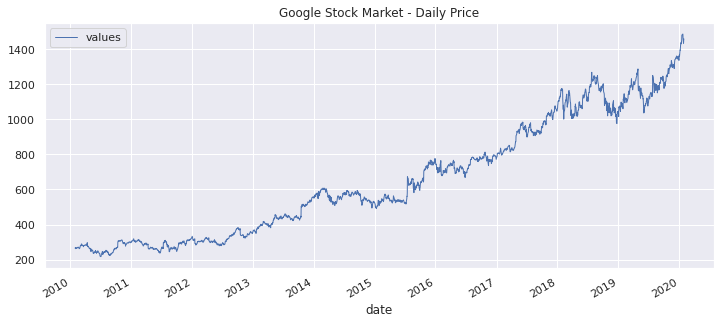

In [ ]:
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})
series.plot(title='Google Stock Market - Daily Price')

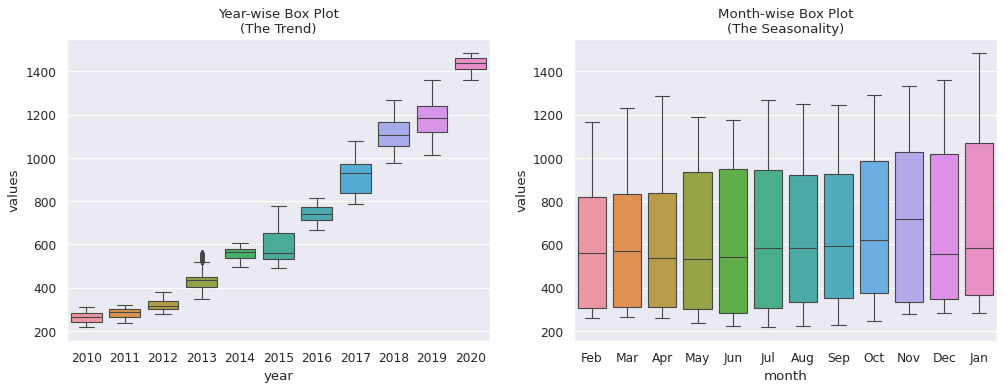

In [ ]:
# Trend and Seasonality Test
seasonal_plots = series.copy()
seasonal_plots.reset_index(inplace=True)

# Prepare data
seasonal_plots['year'] = [d.year for d in seasonal_plots.date]
seasonal_plots['month'] = [d.strftime('%b') for d in seasonal_plots.date]
years = seasonal_plots['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(15,5), dpi= 80)
sns.boxplot(x='year', y='values', data=seasonal_plots, ax=axes[0])
sns.boxplot(x='month', y='values', data=seasonal_plots.loc[~seasonal_plots.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=12); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=12)
plt.show()

## **Preparation**

In [ ]:
# Set seed for reproducibility
tf.random.set_seed(7)

**Data Normalization**

In [ ]:
# LSTMs are sensitive to scale of input data
from sklearn.preprocessing import MinMaxScaler
dataset = series.copy()
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.03804384],
       [0.03729827],
       [0.04110461],
       ...,
       [0.95844589],
       [0.97314544],
       [0.97792707]])

**Train & Test Split**

In [ ]:
# in % of complete dataset
split = 0.8
train_size = int(len(dataset) * split)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
train [0:5] # Show first few values in train data array

array([[0.03804384],
       [0.03729827],
       [0.04110461],
       [0.03559523],
       [0.03736499]])

**Create Sliding Windows (X input & Y output)**

* Window is the number of previous time steps to use as input variables to predict the next time period
* Given the current time (t) we want to predict the value at the next time in the sequence (t+1), 
* Phrased as a regression: input variables are t-2, t-1, t and the output variable is t+1

In [ ]:
window = 3 # Use (t), (t-1) and (t-2) as input variables X
features = 1 # Use only one time series (Google stock data)

# Convert an array of values into a dataset matrix
def create_dataset(dataset, window=window):
	dataX, dataY = [], []
	for i in range(len(dataset)-window-1):
		a = dataset[i:(i+window), 0]
		dataX.append(a)
		dataY.append(dataset[i + window, 0])
	return np.array(dataX), np.array(dataY)

# X is input data = value (at t, and t-1, t-2, depending on window size)
# Y is target data = value at t+1
# Each is additionally divided into train and test set

# Reshape into X=t and Y=t+1 and get as arrays
trainX, trainY = create_dataset(train, window)
testX, testY = create_dataset(test, window)

In [ ]:
# X input has 3 (= window size) values at each step
trainX

array([[0.03804384, 0.03729827, 0.04110461],
       [0.03729827, 0.04110461, 0.03559523],
       [0.04110461, 0.03559523, 0.03736499],
       ...,
       [0.71888154, 0.72496299, 0.73937896],
       [0.72496299, 0.73937896, 0.75053351],
       [0.73937896, 0.75053351, 0.74601968]])

In [ ]:
# Y output has here only one value (t+1) at each step
trainY

array([0.03559523, 0.03736499, 0.03822044, ..., 0.75053351, 0.74601968,
       0.75084863])

Notice how the shape differs: there are 3 values at each step for the input (since we look back 3 steps), but only one value at eahc step for the output, since do not have a multistep forecasting here.

**Reshape Data for LSTM**

* Data is in shape **[samples, features]**. LSTM expects **[samples, time steps, features]**
* Reminder 2D array: shape (n,m), n [0] = rows (time steps), m [1] = column(s)
* Shape: First Block: t, t+1, t+2. Second: t+1, t+2, t+3. Third: t+2, t+3, t+4.
* Approach 1: Use past observations as separate input features =(trainX.shape[0], features, trainX.shape[1])
* Approach 2: Use past observations as time steps of the one input feature **(we do here!)**

In [ ]:
trainX = tf.reshape(trainX, (trainX.shape[0], trainX.shape[1], features))
testX = tf.reshape(testX, (testX.shape[0], testX.shape[1], features))
trainX

<tf.Tensor: shape=(2008, 3, 1), dtype=float64, numpy=
array([[[0.03804384],
        [0.03729827],
        [0.04110461]],

       [[0.03729827],
        [0.04110461],
        [0.03559523]],

       [[0.04110461],
        [0.03559523],
        [0.03736499]],

       ...,

       [[0.71888154],
        [0.72496299],
        [0.73937896]],

       [[0.72496299],
        [0.73937896],
        [0.75053351]],

       [[0.73937896],
        [0.75053351],
        [0.74601968]]])>

## **Model**

**Set Hyperparameter**

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0001)
loss = 'mean_squared_error'
activation = 'tanh'
recurrent_activation= 'sigmoid'
epochs = 8
repeat = 2
batch_size = 4
verbose = 1
units = 16
dropout = 0.02
recurrent_dropout = 0.02

**Create Model** 

In [ ]:
# Deep Stacked LSTM with Memory Between Batches

from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.LSTM(units, 
               batch_input_shape=(batch_size, window, 1), 
               activation=activation,
               recurrent_activation=recurrent_activation,
               dropout=dropout,
               recurrent_dropout=recurrent_dropout,
               unroll=True,
               stateful=True, 
               return_sequences=True))
model.add(layers.LSTM(units, 
               batch_input_shape=(batch_size, window, 1), 
               activation=activation,
               recurrent_activation=recurrent_activation,
               dropout=dropout,
               recurrent_dropout=recurrent_dropout,
               unroll=True,
               stateful=True, 
               return_sequences=True))
model.add(layers.LSTM(units, 
               batch_input_shape=(batch_size, window, 1),
               activation=activation,
               recurrent_activation=recurrent_activation,
               dropout=dropout,
               recurrent_dropout=recurrent_dropout,
               unroll=True,
               stateful=True))
model.add(layers.Dense(1))

**Display Model Topology**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (4, 3, 16)                1152      
_________________________________________________________________
lstm_1 (LSTM)                (4, 3, 16)                2112      
_________________________________________________________________
lstm_2 (LSTM)                (4, 16)                   2112      
_________________________________________________________________
dense (Dense)                (4, 1)                    17        
Total params: 5,393
Trainable params: 5,393
Non-trainable params: 0
_________________________________________________________________


**Compile Model**

In [ ]:
model.compile(optimizer=optimizer, 
              loss=loss, 
              metrics=['accuracy'])

**Prepare Visualization**

In [ ]:
# Plot Losses Keras TF (simple)
!pip install livelossplot --quiet
from livelossplot import PlotLossesKerasTF

#  TensorBoard (advanced)
%load_ext tensorboard
!rm -rf ./logs/
logdir = "logs/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

# Select visualization method
callbacks = [PlotLossesKerasTF()] # [tensorboard_callback]

**Train Model**

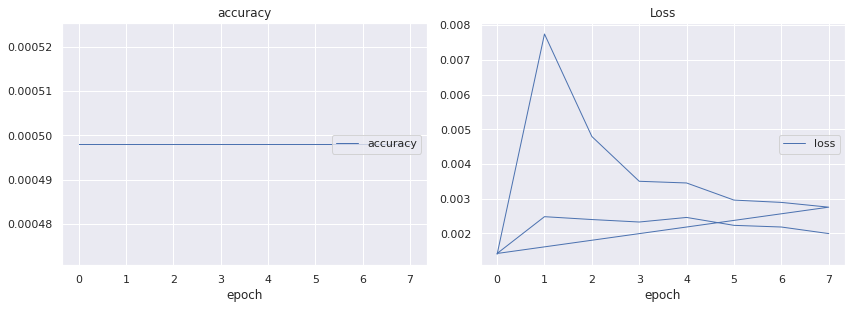

accuracy
	accuracy         	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	loss             	 (min:    0.001, max:    0.008, cur:    0.002)
502/502 [==============================] - 2s 4ms/step - loss: 0.0020 - accuracy: 4.9801e-04


In [ ]:
for i in range(repeat):
	model.fit(trainX, trainY, 
	          epochs=epochs, 
					  batch_size=batch_size, 
						verbose=verbose, 
						shuffle=False, 
            callbacks=callbacks)
	model.reset_states()

**Results in TensorBoard**

In [ ]:
# %tensorboard --logdir logs/

**Simpler LSTM model (alternative)**

In [ ]:
# Second (simpler) Model
# Use past observations as input features (=3) and only one time step

# Reshape Data Format for LSTM
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Model create and train
# model = Sequential()
# model.add(LSTM(4, input_shape=(1, window)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

## **Predictions**

**Make Predictions**

In [ ]:
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

**Invert predictions**

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

**Calculate RMSE**

In [ ]:
import math
from sklearn.metrics import mean_squared_error

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 103.84 RMSE
Test Score: 98.72 RMSE


**Plot results**

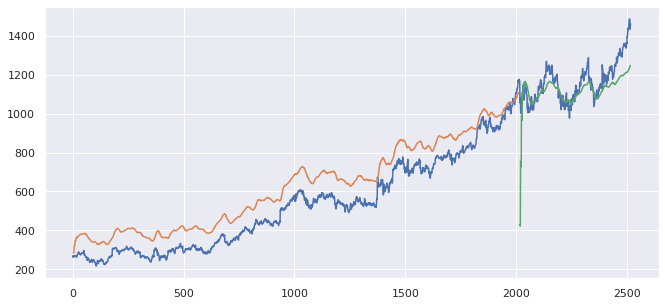

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window:len(trainPredict)+window, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(window*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
sns.set(rc={'figure.figsize':(11, 5)})
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**Get residuals**

In [ ]:
residuals = (testY[0] - testPredict[:,0])
res = pd.DataFrame(data=residuals, columns=['residuals'])
res.head()

,residuals
0,739.075195
1,683.967559
2,628.940918
3,658.629731
4,294.690796
